# ?

1. Can we use Giordano's SINE SNPs
2. Can we find the rDNA loci on UNKN
3. Using coverage - can we use a HMM on SINE

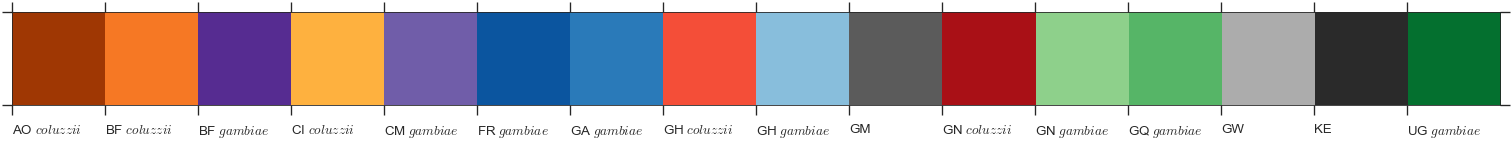

In [275]:
%run data_phase2_ar1.ipynb
# ag1k imports
sys.path.insert(0, '/home/csclarkson/src/python')
from ag1k.util import *
from ag1k import phase2_ar1
from ag1k import phase1_ar3
from ag1k import phase1_ar31

# 1.
Gio's snps - do these hold for phase 2 samples?
 - X 22951731:CO=T, GA=C
 - X 22951783:CO=T, GA=C

In [175]:
x1 = 22951731
x2 = 22951783

In [206]:
#make booleans for m, s and ms.
#as on X, males can't be hets.
tbl = phase2_ar1.tbl_samples
tbl.display(10)

0|ox_code 
 1|src_code 
 2|population 
 3|country 
 4|region 
 5|contributor 
 6|contact 
 7|year 
 8|m_s 
 9|sex 
 10|n_sequences 
 11|mean_coverage 
 
 
 
 
 AA0040-C 
 Twifo_Praso__E2 
 GHcol 
 Ghana 
 Twifo_Praso 
 David Weetman 
 
 2012 
 M 
 F 
 95033368 
 30.99 
 
 
 AA0041-C 
 Twifo_Praso__H3 
 GHcol 
 Ghana 
 Twifo_Praso 
 David Weetman 
 
 2012 
 M 
 F 
 95843804 
 31.7 
 
 
 AA0042-C 
 Takoradi_C7 
 GHcol 
 Ghana 
 Takoradi 
 David Weetman 
 
 2012 
 M 
 F 
 107420666 
 35.65 
 
 
 AA0043-C 
 Takoradi_H8 
 GHcol 
 Ghana 
 Takoradi 
 David Weetman 
 
 2012 
 M 
 F 
 95993752 
 29.46 
 
 
 AA0044-C 
 Takoradi_D10 
 GHcol 
 Ghana 
 Takoradi 
 David Weetman 
 
 2012 
 M 
 F 
 103044262 
 33.67 
 
 
 AA0048-C 
 Madina_A1 
 GHgam 
 Ghana 
 Madina 
 David Weetman 
 
 2012 
 S 
 F 
 101183648 
 32.64 
 
 
 AA0049-C 
 Madina_E3 
 GHcol 
 Ghana 
 Madina 
 David Weetman 
 
 2012 
 M 
 F 
 106641272 
 32.84 
 
 
 AA0050-C 
 Madina_E5 
 GHgam 
 Ghana 
 Madina 
 David Weetman 
 
 2012 
 S 
 F 
 93961924 
 29.82 
 
 
 AA0051-C 
 Twifo_Praso__C1 
 GHcol 
 Ghana 
 Twifo_Praso 
 David Weetman 
 
 2012 
 M 
 F 
 99910300 
 33.33 
 
 
 AA0052-C 
 Twifo_Praso__F2 
 GHcol 
 Ghana 
 Twifo_Praso 
 David Weetman 
 
 2012 
 M 
 F 
 100899280 
 32.29 
 
 
 
 ...

In [177]:
sp = np.asarray(tbl['m_s'])
len(sp)

1142

In [178]:
#remember a number of theses samples do not have species meta data.
spm = sp == 'M'
sps = sp == 'S'
sph = sp == 'M/S'
np.count_nonzero(sph)

22

In [179]:
#get genotypes from X
#are these positions in the pass data?
passposx = phase2_ar1.callset_pass['X']['variants']['POS'][:]
x1 in passposx, x2 in passposx

(True, True)

In [180]:
#let's look at a variant table at these positions
vtbl = allel.VariantChunkedTable(callset_pass['X']['variants'], names=('POS', 'REF', 'ALT'))
vtbl

<VariantChunkedTable shape=(5765843,) dtype=[('POS', '<i4'), ('REF', 'S1'), ('ALT', 'S1', (3,))]
   nbytes=44.0M cbytes=13.8M cratio=3.2
   values=h5py._hl.group.Group>

In [181]:
vtbl.query('POS == 22951731')

<VariantChunkedTable shape=(1,) dtype=[('POS', '<i4'), ('REF', 'S1'), ('ALT', 'S1', (3,))]
   nbytes=8 cbytes=939 cratio=0.0
   values=allel.chunked.storage_zarr.ZarrTable>

In [182]:
vtbl.query('POS == 22951783')

<VariantChunkedTable shape=(1,) dtype=[('POS', '<i4'), ('REF', 'S1'), ('ALT', 'S1', (3,))]
   nbytes=8 cbytes=939 cratio=0.0
   values=allel.chunked.storage_zarr.ZarrTable>

### what do the genotypes look like

In [183]:
aim1 = passposx == x1
aim2 = passposx == x2

In [184]:
gt = allel.GenotypeChunkedArray(callset_pass['X']['calldata']['genotype'])

In [198]:
g1 = gt.compress(aim1, axis=0)

In [193]:
g1.count_alleles_subpops(subpops, max_allele=3)

<AlleleCountsChunkedTable shape=(1,) dtype=[('AOcol', '<i4', (4,)), ('BFcol', '<i4', (4,)), ('BFgam', '<i4', (4,)), ('CIcol', '<i4', (4,)), ('CMgam', '<i4', (4,)), ('FRgam', '<i4', (4,)), ('GAgam', '<i4', (4,)), ('GHcol', '<i4', (4,)), ('GHgam', '<i4', (4,)), ('GM', '<i4', (4,)), ('GNcol', '<i4', (4,)), ('GNgam', '<i4', (4,)), ('GQgam', '<i4', (4,)), ('GW', '<i4', (4,)), ('KE', '<i4', (4,)), ('UGgam', '<i4', (4,))]
   nbytes=256 cbytes=5.3K cratio=0.0
   values=allel.chunked.storage_zarr.ZarrTable>

In [199]:
g2 = gt.compress(aim2, axis=0)

In [195]:
g2.count_alleles_subpops(subpops, max_allele=3)

<AlleleCountsChunkedTable shape=(1,) dtype=[('AOcol', '<i4', (4,)), ('BFcol', '<i4', (4,)), ('BFgam', '<i4', (4,)), ('CIcol', '<i4', (4,)), ('CMgam', '<i4', (4,)), ('FRgam', '<i4', (4,)), ('GAgam', '<i4', (4,)), ('GHcol', '<i4', (4,)), ('GHgam', '<i4', (4,)), ('GM', '<i4', (4,)), ('GNcol', '<i4', (4,)), ('GNgam', '<i4', (4,)), ('GQgam', '<i4', (4,)), ('GW', '<i4', (4,)), ('KE', '<i4', (4,)), ('UGgam', '<i4', (4,))]
   nbytes=256 cbytes=5.3K cratio=0.0
   values=allel.chunked.storage_zarr.ZarrTable>

#### So, these markers look pretty good outside of the expected mess in GW
- outside of GW x1 only shows two discordant markers, one in GNgam is probably the hybrid indiv included in this population
    - look at the GM sample in more detail
- x2 other than GW we see one het in GNgam again (probably the hybrid), one in GM again and a new het in KE

# Which are the discordant individuals?

In [343]:
#lets grab the known hybrid that is in GNgam and see what its SINE genotype is
gndis = phase2_ar1.samples
gndis[(gndis.population == 'GNgam') & (gndis.m_s == 'M/S')]

ox_code src_code population country   region      contributor  \
1033  AV0007-C    KB041      GNgam  Guinea  Koraboh  Kenneth Vernick   

                               contact    year  m_s sex  n_sequences  \
1033  Michelle Riehle, Karin Eiglmeier  2012.0  M/S   F     86368656   

      mean_coverage  
1033          28.76

In [238]:
c = []
c.append(1033)
type(c)

list

In [242]:
gnx1 = g1.take(c, axis=1)
gnx1

<GenotypeChunkedArray shape=(1, 1, 2) dtype=int8 chunks=(1, 1, 2)
   nbytes=2 cbytes=349 cratio=0.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [241]:
gnx2 = g2.take(c, axis=1)
gnx2

<GenotypeChunkedArray shape=(1, 1, 2) dtype=int8 chunks=(1, 1, 2)
   nbytes=2 cbytes=349 cratio=0.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

### so the discordant GNgam individual is the one we know about - is a hybrid according to meta

## what about the GM discordance - is this one individual?

In [253]:
gm1 = g1.subset(sel0=None, sel1=subpops['GM'])
gm1[:].displayall()

<GenotypeArray shape=(1, 65, 2) dtype=int8> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 0 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 0/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1

In [254]:
gm2 = g2.subset(sel0=None, sel1=subpops['GM'])
gm2[:].displayall()

<GenotypeArray shape=(1, 65, 2) dtype=int8> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 0 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 0/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1

### yes, just one hybrid in GM...
402	AG0214-C	2712	GM	Gambia, The	KSK	Martin Donnelly	NaN	2011.0	NaN	F	114088166	28.97

## and the Kenyan individual?

In [257]:
ke2 = g2.subset(sel0=None, sel1=subpops['KE'])
ke2[:].displayall()

<GenotypeArray shape=(1, 48, 2) dtype=int8> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 0 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 0/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1 1/1

In [357]:
gndis[(gndis.population == 'KE')]

ox_code src_code population country          region   contributor  \
502  AK0060-C    KIL51         KE   Kenya    Kilifi-Junju  Janet Midega   
503  AK0062-C    KIL47         KE   Kenya    Kilifi-Junju  Janet Midega   
504  AK0065-C     KIL3         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
505  AK0066-C     KIL4         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
506  AK0067-C     KIL5         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
507  AK0068-C     KIL6         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
508  AK0069-C     KIL7         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
509  AK0070-C     KIL8         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
510  AK0072-C    KIL10         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
511  AK0073-C    KIL11         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
512  AK0074-C    KIL12         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
513  AK0075-C    KIL13         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
514  AK0076-C    KIL14         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
515  AK0077-C    KIL15         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
516  AK0078-C    KIL16         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
517  AK0079-C    KIL17         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
518  AK0080-C    KIL18         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
519  AK0081-C    KIL19         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
520  AK0082-C    KIL20         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
521  AK0085-C    KIL23         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
522  AK0086-C    KIL24         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
523  AK0087-C    KIL25         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
524  AK0088-C    KIL26         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
525  AK0089-C    KIL27         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
526  AK0090-C    KIL28         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
527  AK0091-C    KIL29         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
528  AK0092-C    KIL30         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
529  AK0093-C    KIL31         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
530  AK0094-C    KIL32         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
531  AK0095-C    KIL33         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
532  AK0096-C    KIL56         KE   Kenya    Kilifi-Junju  Janet Midega   
533  AK0098-C    KIL58         KE   Kenya    Kilifi-Junju  Janet Midega   
534  AK0099-C    KIL59         KE   Kenya    Kilifi-Junju  Janet Midega   
535  AK0100-C    KIL60         KE   Kenya    Kilifi-Junju  Janet Midega   
536  AK0101-C    KIL61         KE   Kenya    Kilifi-Junju  Janet Midega   
537  AK0102-C    KIL62         KE   Kenya    Kilifi-Junju  Janet Midega   
538  AK0103-C    KIL63         KE   Kenya    Kilifi-Junju  Janet Midega   
539  AK0104-C    KIL64         KE   Kenya    Kilifi-Junju  Janet Midega   
540  AK0105-C    KIL65         KE   Kenya    Kilifi-Junju  Janet Midega   
541  AK0106-C    KIL66         KE   Kenya    Kilifi-Junju  Janet Midega   
542  AK0107-C    KIL67         KE   Kenya    Kilifi-Junju  Janet Midega   
543  AK0108-C    KIL68         KE   Kenya    Kilifi-Junju  Janet Midega   
544  AK0109-C    KIL69         KE   Kenya    Kilifi-Junju  Janet Midega   
545  AK0110-C    KIL70         KE   Kenya    Kilifi-Junju  Janet Midega   
546  AK0116-C    KIL76         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
547  AK0117-C    KIL77         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
548  AK0119-C    KIL79         KE   Kenya  Kilifi-Mbogolo  Janet Midega   
549  AK0127-C    KIL86         KE   Kenya  Kilifi-Mbogolo  Janet Midega   

    contact    year  m_s sex  n_sequences  mean_coverage  
502     NaN  2012.0  NaN   F    102532296          29.43  
503     NaN  2012.0  NaN   F    101494060          33.21  
504     NaN  2012.0  NaN   F    117270550          37.65  
505     NaN  2012.0  NaN   F     98872614          32.73  
506     NaN  2012.0  NaN   F     90

511	AK0073-C	KIL11	KE	Kenya	Kilifi-Mbogolo	Janet Midega	NaN	2012.0	NaN	F	84724840	27.86

# So, three discordant hybrids, one we knew was a hybrid and two others from populations that were not molecularly typed - 100% CONCORDANCE!

# 2.
#### - rDNA

GTGCCCCTTCCTCGATGGCGCAACGAACCATCTTGGTCTG 
- Fanello et al 2002 
- GC in middle should be AT in coluzzii

- in pest you get loads of identical hits to different regions of the UNKN
- except middle GC is actually GT in PEST
- only a couple of hits in the coluzzii reference but multiple differences to Fanello seq

- click me to view properly
- Query	1 ..........GTGCCCCTTCCTCGATGGCGCAACGAACCATCTTGGTCTG	40
- ..................|||||||||||||||||||| |||||||||||||||||||	
- Sbjct	30182892....GTGCCCCTTCCTCGATGGCGTAACGAACCATCTTGGTCTG	30182931

In [285]:
g = phase2_ar1.callset['UNKN']

In [264]:
allp = g['variants/POS'][:]
allp

array([      11,       21,       24, ..., 42389845, 42389848, 42389868], dtype=int32)

In [287]:
gen = allel.GenotypeChunkedArray(g['calldata/genotype'])

In [282]:
mask = (allp > 30182892) & (allp < 30182931)
np.count_nonzero(mask)

In [288]:
#compress to rdna variants
rdna = gen.compress(mask)

In [291]:

rdna.count_alleles_subpops(subpops)

<AlleleCountsChunkedTable shape=(5,) dtype=[('AOcol', '<i4', (2,)), ('BFcol', '<i4', (2,)), ('BFgam', '<i4', (2,)), ('CIcol', '<i4', (2,)), ('CMgam', '<i4', (2,)), ('FRgam', '<i4', (2,)), ('GAgam', '<i4', (2,)), ('GHcol', '<i4', (2,)), ('GHgam', '<i4', (2,)), ('GM', '<i4', (2,)), ('GNcol', '<i4', (2,)), ('GNgam', '<i4', (2,)), ('GQgam', '<i4', (2,)), ('GW', '<i4', (2,)), ('KE', '<i4', (2,)), ('UGgam', '<i4', (2,))]
   nbytes=640 cbytes=5.7K cratio=0.1
   values=allel.chunked.storage_zarr.ZarrTable>

In [292]:
allp.compress(mask)

array([30182901, 30182908, 30182911, 30182912, 30182929], dtype=int32)

## Looks like UNKN:30182912 is an AIM

# 3.
- SINE depth, is it worth playing with a HMM?
- do some mean depth windowed plots on X (i.e. around X:22951731)

In [312]:
phase2_ar1.samples

ox_code         src_code population        country       region  \
0     AA0040-C  Twifo_Praso__E2      GHcol          Ghana  Twifo_Praso   
1     AA0041-C  Twifo_Praso__H3      GHcol          Ghana  Twifo_Praso   
2     AA0042-C      Takoradi_C7      GHcol          Ghana     Takoradi   
3     AA0043-C      Takoradi_H8      GHcol          Ghana     Takoradi   
4     AA0044-C     Takoradi_D10      GHcol          Ghana     Takoradi   
5     AA0048-C        Madina_A1      GHgam          Ghana       Madina   
6     AA0049-C        Madina_E3      GHcol          Ghana       Madina   
7     AA0050-C        Madina_E5      GHgam          Ghana       Madina   
8     AA0051-C  Twifo_Praso__C1      GHcol          Ghana  Twifo_Praso   
9     AA0052-C  Twifo_Praso__F2      GHcol          Ghana  Twifo_Praso   
10    AA0053-C  Twifo_Praso__A4      GHcol          Ghana  Twifo_Praso   
11    AA0054-C      Takoradi_E7      GHcol          Ghana     Takoradi   
12    AA0055-C      Takoradi_B9      GHcol          Ghana     Takoradi   
13    AA0056-C     Takoradi_G10      GHcol          Ghana     Takoradi   
14    AA0060-C        Madina_C1      GHgam          Ghana       Madina   
15    AA0061-C        Madina_F3      GHgam          Ghana       Madina   
16    AA0063-C  Twifo_Praso__D1      GHcol          Ghana  Twifo_Praso   
17    AA0064-C  Twifo_Praso__G2      GHcol          Ghana  Twifo_Praso   
18    AA0066-C      Takoradi_G7      GHcol          Ghana     Takoradi   
19    AA0067-C      Takoradi_C9      GHcol          Ghana     Takoradi   
20    AA0068-C     Takoradi_H10      GHcol          Ghana     Takoradi   
21    AA0072-C        Madina_F1      GHgam          Ghana       Madina   
22    AA0073-C        Madina_H3      GHcol          Ghana       Madina   
23    AA0074-C        Madina_G5      GHcol          Ghana       Madina   
24    AA0075-C  Twifo_Praso__F1      GHcol          Ghana  Twifo_Praso   
25    AA0076-C  Twifo_Praso__B3      GHcol          Ghana  Twifo_Praso   
26    AA0077-C  Twifo_Praso__C4      GHcol          Ghana  Twifo_Praso   
27    AA0080-C     Takoradi_A11      GHcol          Ghana     Takoradi   
28    AA0084-C        Madina_A2      GHgam          Ghana       Madina   
29    AA0085-C        Madina_A4      GHgam          Ghana       Madina   
...        ...              ...        ...            ...          ...   
1112  AY0056-C        Tia_aPM_8      CIcol  Cote d'Ivoire     Tiassale   
1113  AY0057-C       Tia_aPM_17      CIcol  Cote d'Ivoire     Tiassale   
1114  AY0058-C       Tia_aPM_25      CIcol  Cote d'Ivoire     Tiassale   
1115  AY0059-C       Tia_aPM_36      CIcol  Cote d'Ivoire     Tiassale   
1116  AY0060-C       Tia_aPM_30      CIcol  Cote d'Ivoire     Tiassale   
1117  AY0061-C        Tia_dPM_3      CIcol  Cote d'Ivoire     Tiassale   
1118  AY0062-C       Tia_dPM_10      CIcol  Cote d'Ivoire     Tiassale   
1119  AY0063-C       Tia_dPM_18      CIcol  Cote d'Ivoire     Tiassale   
1120  AY0064-C       Tia_dPM_25      CIcol  Cote d'Ivoire     Tiassale   
1121  AY0065-C       Tia_dPM_48      CIcol  Cote d'Ivoire     Tiassale   
1122  AY0066-C       Tia_dPM_54      CIcol  Cote d'Ivoire     Tiassale   
1123  AY0067-C        Tia_aPM_6      CIcol  Cote d'Ivoire     Tiassale   
1124  AY0068-C       Tia_aPM_15      CIcol  Cote d'Ivoire     Tiassale   
1125  AY0069-C       Tia_aPM_24      CIcol  Cote d'Ivoire     Tiassale   
1126  AY0070-C       Tia_aPM_35      CIcol  Cote d'Ivoire     Tiassale   
1127  AY0072-C        Tia_dPM_2      CIcol  Cote d'Ivoire     Tiassale   
1128  AY0074-C       Tia_dPM_17      CIcol  Cote d'Ivoire     Tiassale   
1129  AY0076-C       Tia_dPM_47      CIcol  Cote d'Ivoire     Tiassale   
1130  AY0077-C       Tia_dPM_53      CIcol  Cote d'Ivoire     Tiassale   
1131  AY0078-C        Tia_aPM_5      CIcol  Cote d'Ivoire     Tiassale   
1132  AY0079-C       Tia_aPM_14      CIcol  Cote d'Ivoire     Tiassale   
1133  AY0080-C       Tia_aPM_23      CIcol  Cote d'Ivoire     Tiassale   
1134  AY008

In [350]:
ex = callset['X']

In [353]:
dep = ex['calldata/DP']
dep

<HDF5 dataset "DP": shape (9389639, 1142), type "<u2">

In [299]:
pos = ex['variants/POS']
pos

<HDF5 dataset "POS": shape (9389639,), type "<i4">

(0, 100)

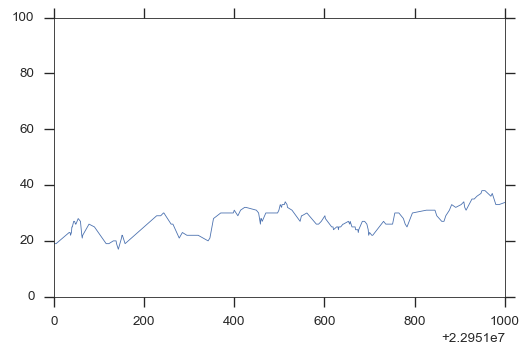

In [336]:
dep = ex['calldata/DP'][:,0]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

(0, 100)

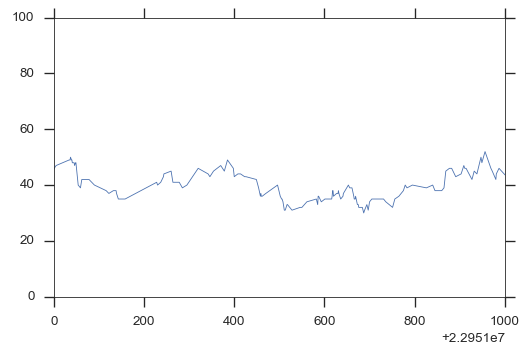

In [337]:
dep = ex['calldata/DP'][:,2]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

(0, 100)

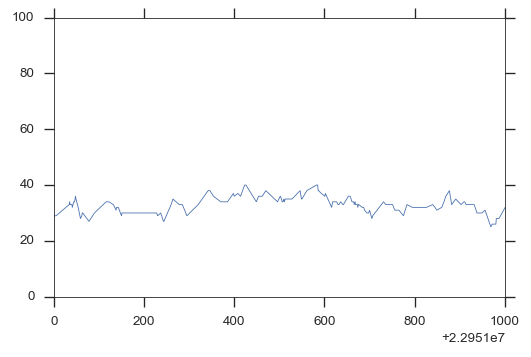

In [338]:
dep = ex['calldata/DP'][:,1127]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

(0, 100)

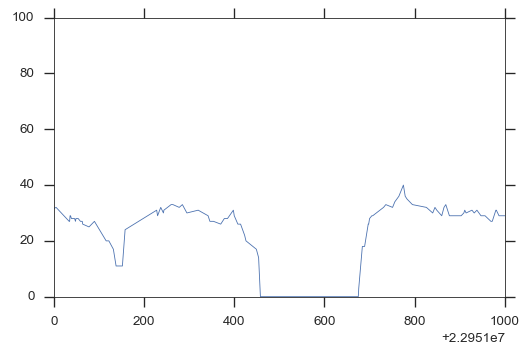

In [339]:
dep = ex['calldata/DP'][:,5]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

(0, 100)

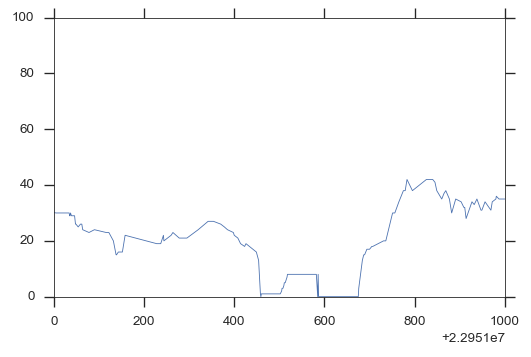

In [340]:
dep = ex['calldata/DP'][:,7]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

(0, 100)

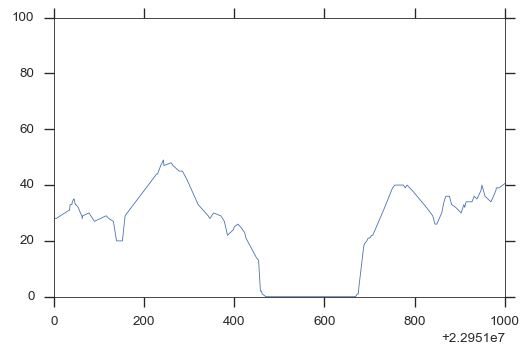

In [341]:
dep = ex['calldata/DP'][:,29]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

# looks like the SINE signal is strong - worth a HMM?

- but let's look at some hybrids (could also use the Mali x Pimperena crosses)

- 402 AG0214-C 2712 GM Gambia, The KSK Martin Donnelly NaN 2011.0 NaN F 114088166 28.97402 AG0214-C 2712 GM Gambia, The KSK Martin Donnelly NaN 2011.0 NaN F 114088166 28.97

- 511 AK0073-C KIL11 KE Kenya Kilifi-Mbogolo Janet Midega NaN 2012.0 NaN F 84724840 27

- 1033	AV0007-C	KB041	GNgam	Guinea	Koraboh	Kenneth Vernick	Michelle Riehle, Karin Eiglmeier	2012.0	M/S	F	86368656	28.76

(0, 100)

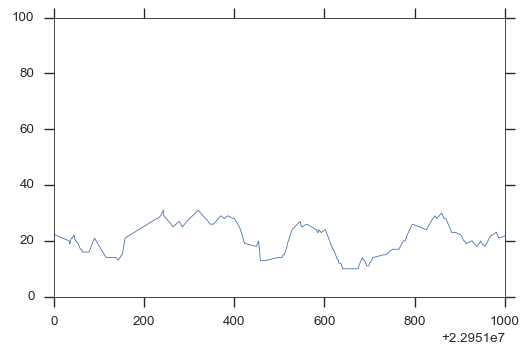

In [354]:
dep = ex['calldata/DP'][:,402]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

(0, 100)

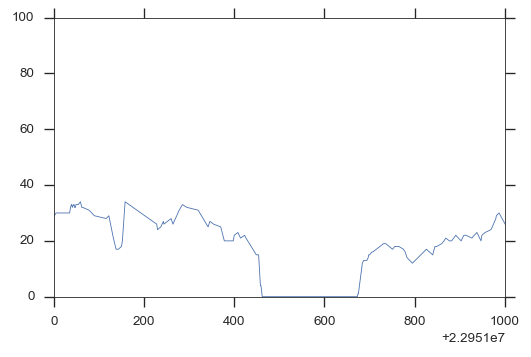

In [355]:
dep = ex['calldata/DP'][:,511]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

(0, 100)

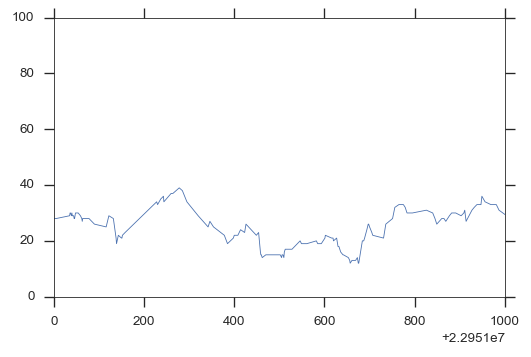

In [356]:
dep = ex['calldata/DP'][:,1033]
plt.plot(pos,dep)
plt.xlim(22951000,22952000)
plt.ylim(0,100)

# On of the crosses is a M/S hybrid - we can use the offspring to look at more SINE DP

In [388]:
cr = h5py.File('/kwiat/vector/ag1000g/release/phase1.AR3/variation/crosses/ar3/hdf5/ag1000g.crosses.phase1.ar3sites.h5', 'r')

In [389]:
list(cr['X'].keys())

['calldata', 'samples', 'variants']

In [390]:
crs = cr['X/samples'][:]

In [425]:
crs.shape

(80,)

In [427]:
fhyb = np.asarray(['AD0352-C',
           'AD0353-C',
           'AD0354-C',
           'AD0355-C',
           'AD0357-C',
           'AD0358-C',
           'AD0360-C',
           'AD0361-C',
           'AD0363-C',
           'AD0366-C',
           'AD0367-C',   
           'AD0368-C', 
           'AD0369-C', 
           'AD0370-C'],
                  dtype='|S8')

In [419]:
fhyp_boo = np.in1d(crs, fhyb)

In [421]:
crdp = cr['X/calldata/DP'][:]

In [422]:
crdp.shape

(8463951, 80)

In [423]:
pos = cr['X/variants/POS']
pos

<HDF5 dataset "POS": shape (8463951,), type "<i4">

In [445]:
def plot_sine(index):
    bonk = np.where(crs == fhyb[index])[0][0]
    dep = crdp[:,bonk]
    plt.plot(pos,dep)
    plt.xlim(22951000,22952000)
    plt.ylim(0,60)
    plt.show();

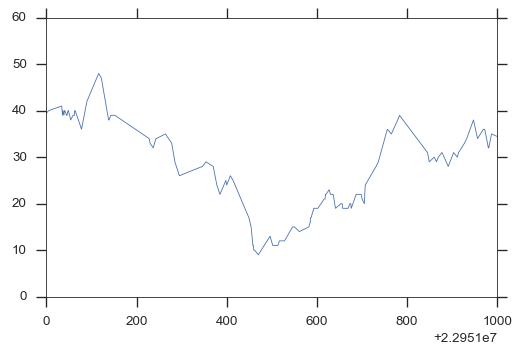

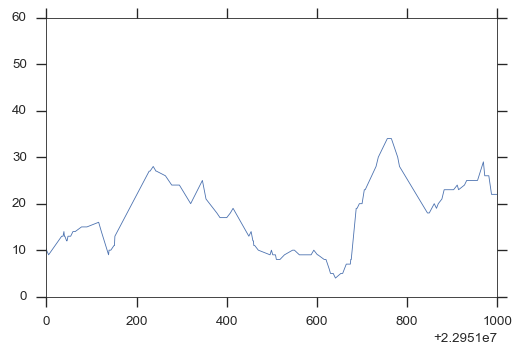

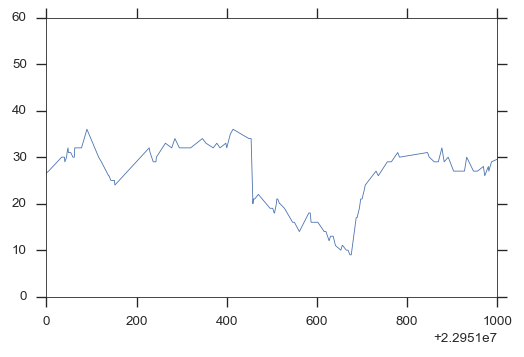

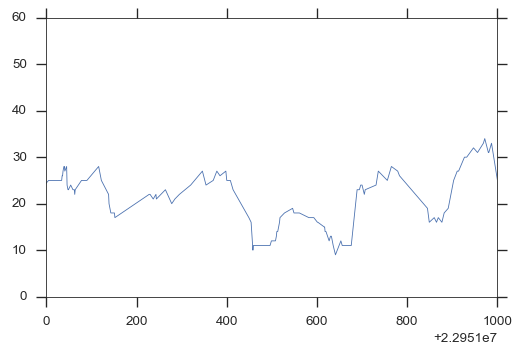

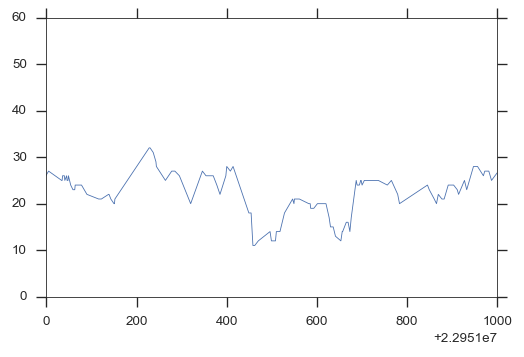

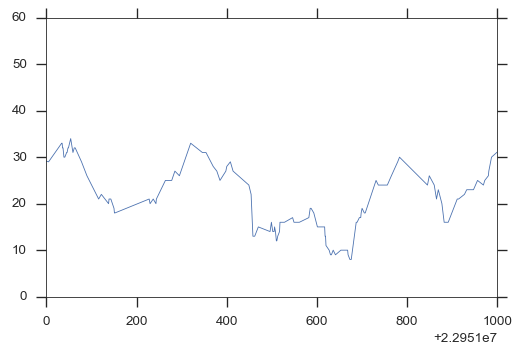

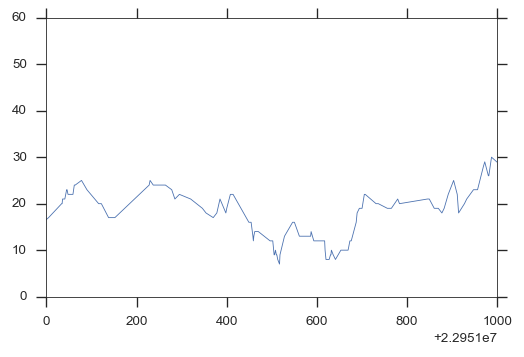

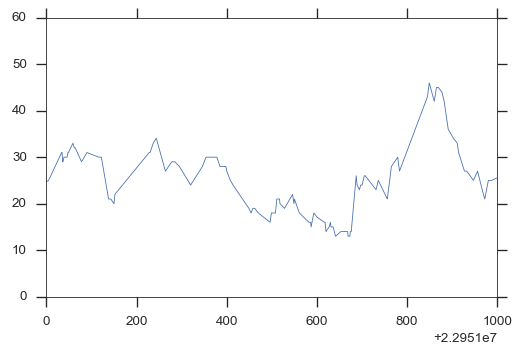

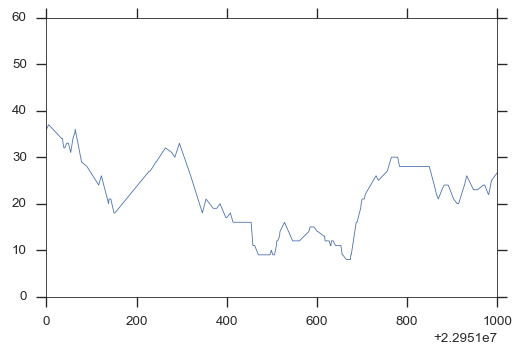

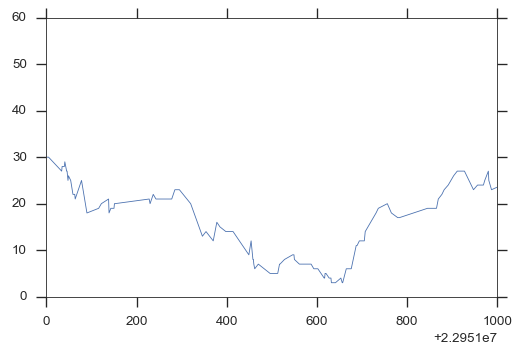

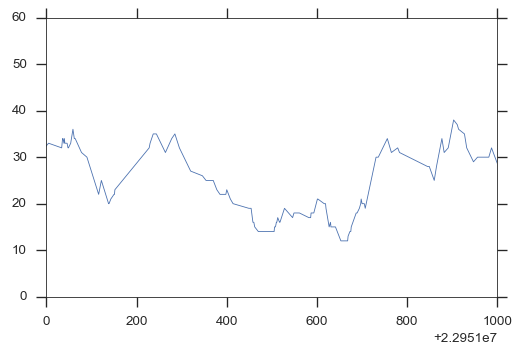

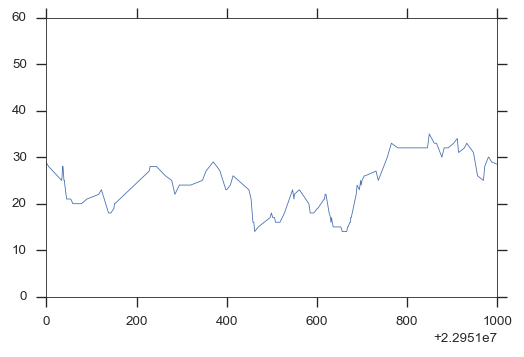

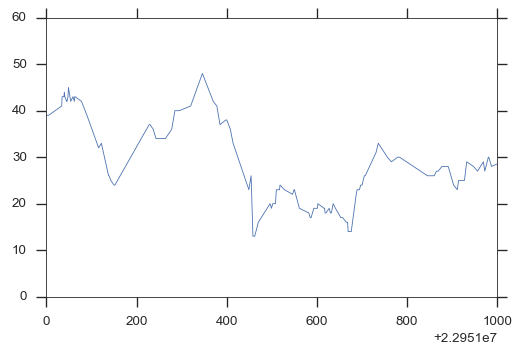

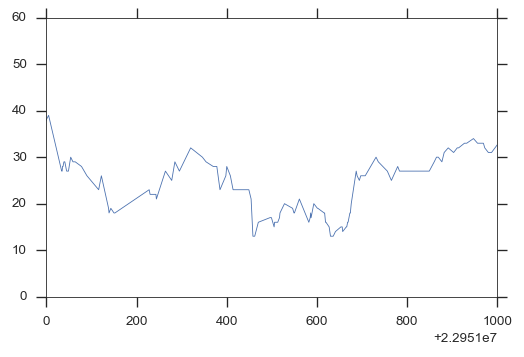

In [446]:
for index in range(0,14):
    plot_sine(index)

## what about the males (one X)

In [447]:
mhyb = np.asarray(['AD0351-C',
           'AD0356-C',
           'AD0359-C',
           'AD0362-C',
           'AD0364-C',
           'AD0365-C'],
        dtype='|S8')

In [449]:
def plot_sine(index):
    bonk = np.where(crs == mhyb[index])[0][0]
    dep = crdp[:,bonk]
    plt.plot(pos,dep)
    plt.xlim(22951000,22952000)
    plt.ylim(0,60)
    plt.show();

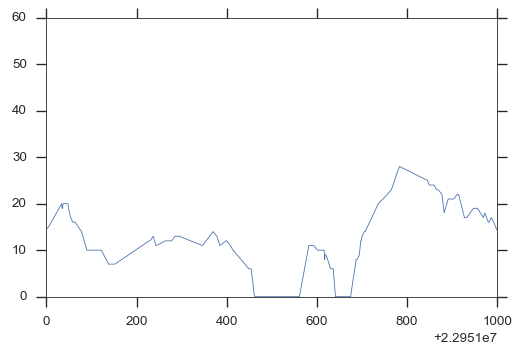

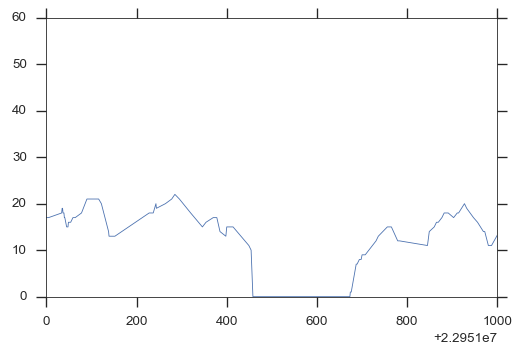

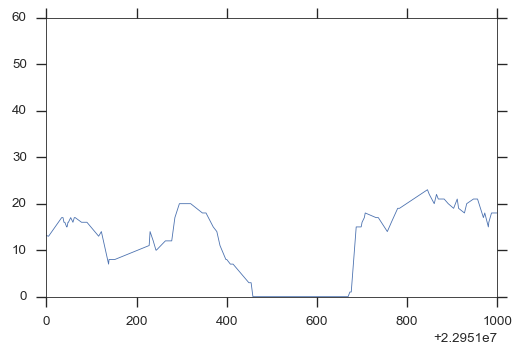

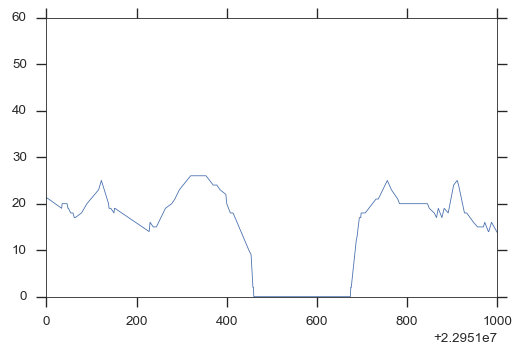

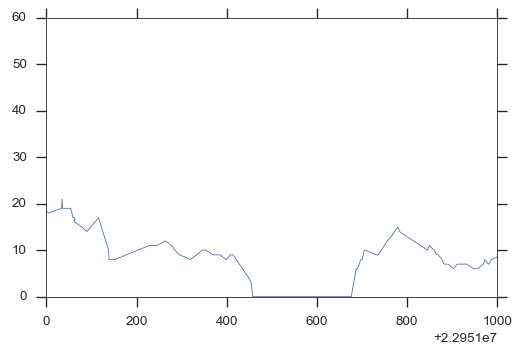

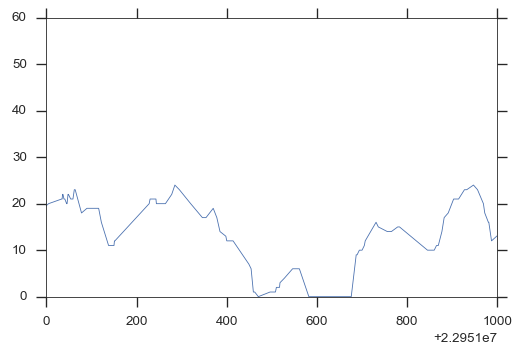

In [450]:
for index in range(0,6):
    plot_sine(index)

# Right, so DP doesn't look brilliant for detecting hybrid females (and of course we can't detect hybrid males!)
- use pysamstats to look for more informative metrics

In [5]:
import pysam
import pysamstats
pysamstats.__version__

'0.24.3'

In [6]:
def better_hmm_stats(indv):    

    #load some stuff
    bam_fn_template = '/kwiat/2/mirror/vector/bam/bwa_gatk/{indv}.bam'
    bam_fn = bam_fn_template.format(indv=indv)
    bam = pysam.Samfile(bam_fn)
    fasta = pysam.Fastafile(phase1_ar3.genome_fn)
    #generate stats for a 10kb region
    stat = pysamstats.load_coverage_ext(bam, chrom='X', start=22946600, end=22956600, pad=True)
    #grab the useful stats
    pos = stat.pos
    reads_all = stat.reads_all
    reads_pp = stat.reads_pp
    reads_mate_unmapped = stat.reads_mate_unmapped
    reads_mate_other_chr = stat.reads_mate_other_chr
    reads_mate_same_strand = stat.reads_mate_same_strand
    reads_softclipped = stat.reads_softclipped
    #plot that majick
    plt.plot(pos,reads_all, 'k')
    plt.plot(pos, reads_pp, 'r')
    plt.plot(pos, reads_mate_unmapped, 'b')
    plt.plot(pos, reads_mate_other_chr, 'green')
    plt.plot(pos, reads_mate_same_strand, 'purple')
    plt.plot(pos, reads_softclipped, 'orange')
    plt.xlim(22951000,22952000)
    plt.ylim(0,40)
    plt.show();

In [7]:
fhy_indv = np.asarray(['AD0352_C',
           'AD0353_C',
           'AD0354_C',
           'AD0355_C',
           'AD0357_C',
           'AD0358_C',
           'AD0360_C',
           'AD0361_C',
           'AD0363_C',
           'AD0366_C',
           'AD0367_C',   
           'AD0368_C', 
           'AD0369_C', 
           'AD0370_C'],
                     )

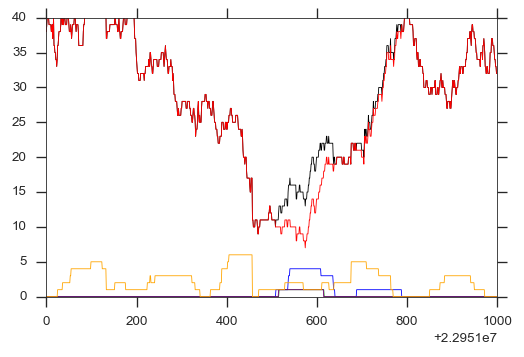

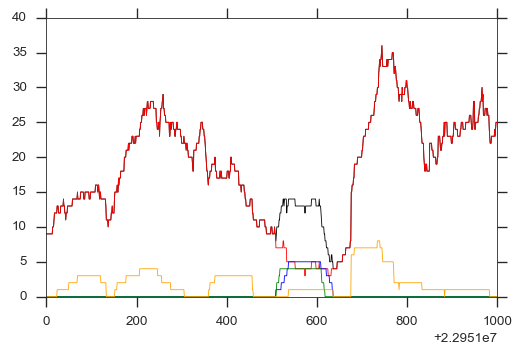

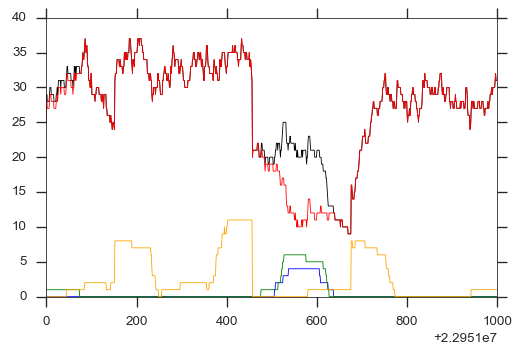

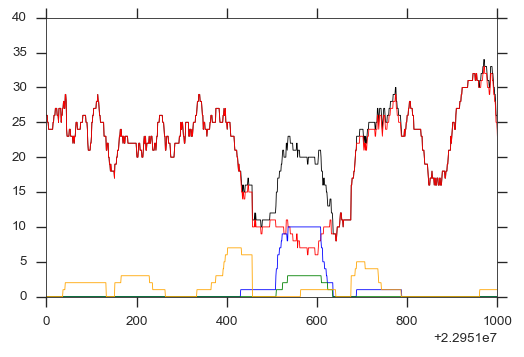

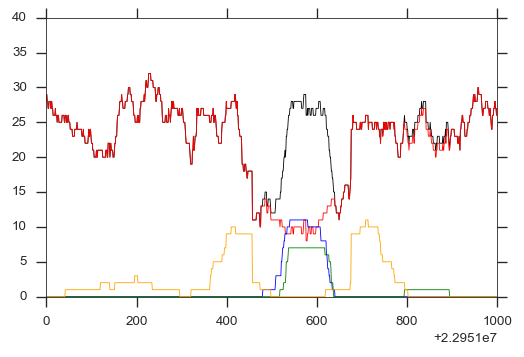

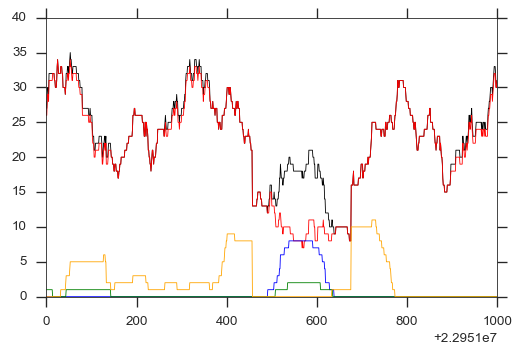

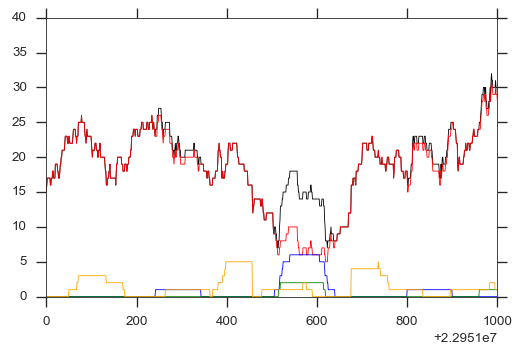

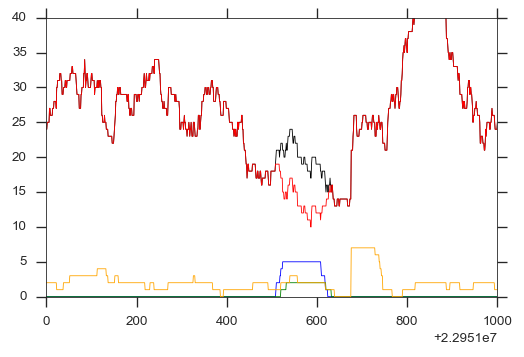

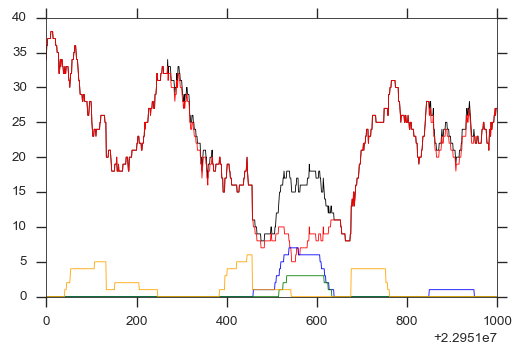

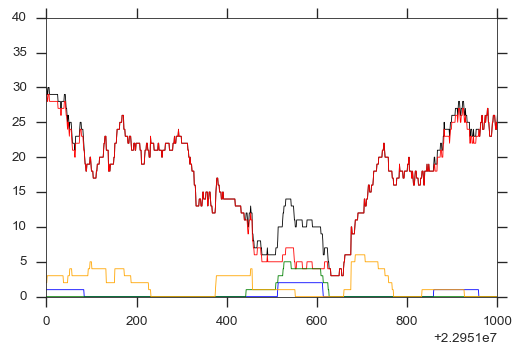

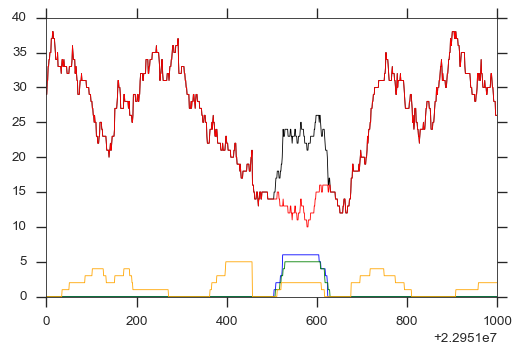

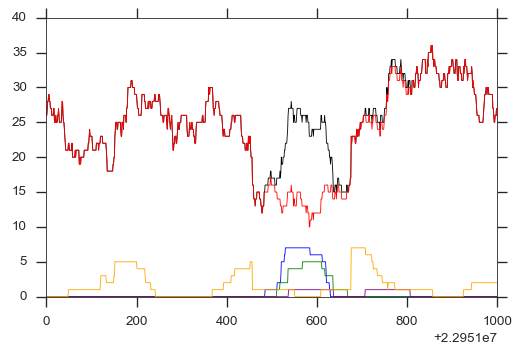

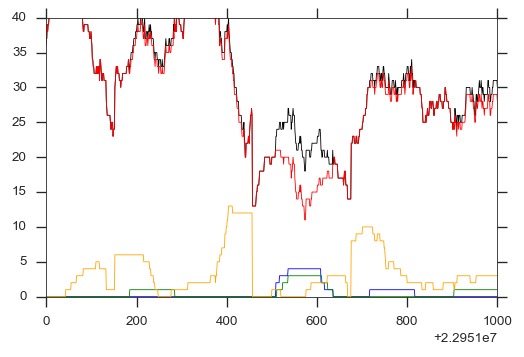

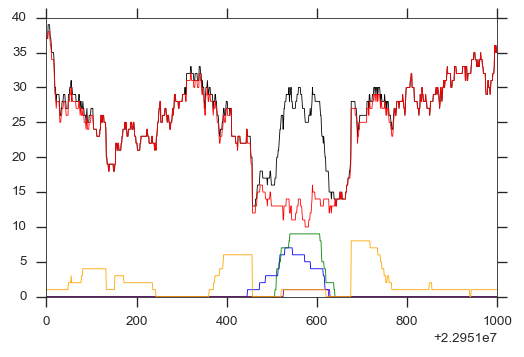

In [8]:
for indv in fhy_indv:
    better_hmm_stats(indv)

#### awesome sauce, reads_pp (properly paired reads) seems to get rid of the bump in hybrids (and probably in gambiae too)
# Let's HMM

In [9]:
bam_fn_template = '/kwiat/2/mirror/vector/bam/bwa_gatk/{indv}.bam'
bam_fn = bam_fn_template.format(indv=fhy_indv[0])
bam = pysam.Samfile(bam_fn)
fasta = pysam.Fastafile(phase1_ar3.genome_fn)

In [10]:
chrom = 'X'
coverage = pysamstats.load_coverage_ext(bam,  chrom=chrom, pad=True, start=22946600, end=22956600)
coverage

rec.array([(b'X', 22946506, 1, 1, 0, 0, 0, 0, 0, 0),
 (b'X', 22946507, 1, 1, 0, 0, 0, 0, 0, 0),
 (b'X', 22946508, 2, 2, 0, 0, 0, 0, 0, 0), ...,
 (b'X', 22956688, 1, 1, 0, 0, 0, 0, 1, 0),
 (b'X', 22956689, 1, 1, 0, 0, 0, 0, 1, 0),
 (b'X', 22956690, 1, 1, 0, 0, 0, 0, 1, 0)], 
          dtype=[('chrom', 'S12'), ('pos', '<i4'), ('reads_all', '<i4'), ('reads_pp', '<i4'), ('reads_mate_unmapped', '<i4'), ('reads_mate_other_chr', '<i4'), ('reads_mate_same_strand', '<i4'), ('reads_faceaway', '<i4'), ('reads_softclipped', '<i4'), ('reads_duplicate', '<i4')])

In [11]:
#don't need to use binned stats here, small region means HMM should handle all sites
#Let's look at coverage bias in this region - AT rich = less coverage
# we need binned stats for gc stat though!
chrom = 'X'
coverageb = pysamstats.load_coverage_ext_binned(bam, fasta, chrom=chrom, pad=True, start=22946600, end=22956600, window_size=100)

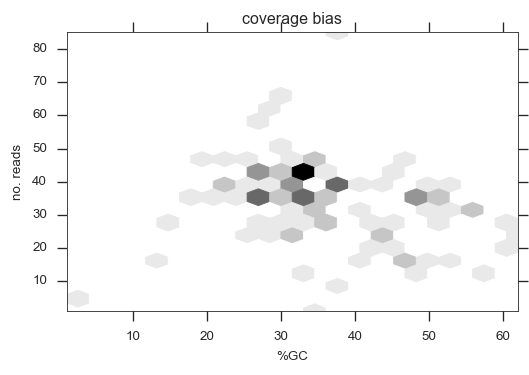

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hexbin(coverageb.gc, coverageb.reads_pp, cmap='Greys', gridsize=20)
ax.set_xlabel('%GC')
ax.set_ylabel('no. reads')
ax.set_title('coverage bias')
#ax.set_xlim(22951000,22952000)

In [13]:
#looks okay, no super bias

## coverage normalisation

In [123]:
depth_normed = coverage.reads_pp / np.median(coverage.reads_pp)*2

In [124]:
depth_normed.shape

(10185,)

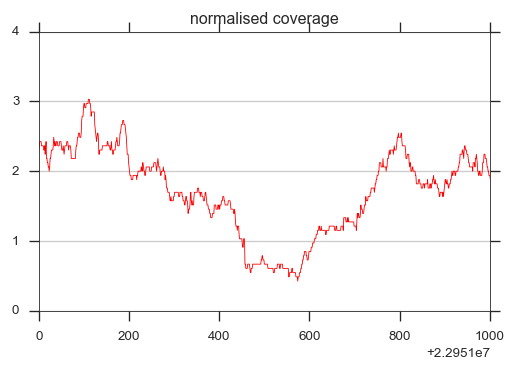

In [126]:
plt.plot(coverage.pos, depth_normed, 'r')
plt.xlim(22951000,22952000)
plt.ylim(0,2)
plt.yticks(range(5))
plt.grid(axis='y')
plt.title('normalised coverage')
plt.show();

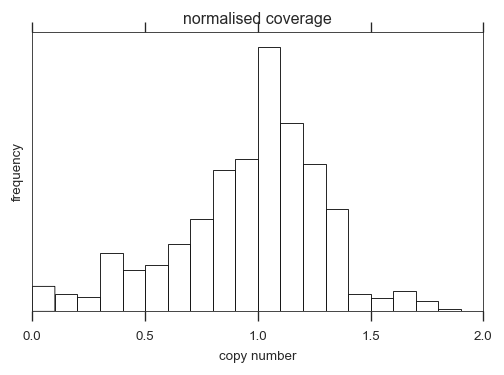

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(depth_normed, color='w', bins=np.arange(0, 2, .1))
ax.set_yticks([])
ax.set_ylabel('frequency')
ax.set_xlabel('copy number')
ax.set_title('normalised coverage');

In [91]:
#looks pretty gaussian to me!

## copy number prediction

In [127]:
from hmmlearn.hmm import GaussianHMM


def fit_hmm(depth_normed,  # normalised coverage array 
            transition_probability,  # probability of state transition
            variance,  # variance per copy 
            variance_fixed,  # variance for the zero copy number state 
            min_copy_number=0,  # minimum copy number to consider in the model
            max_copy_number=5,  # maximum copy number to consider in the model 
            n_iter=0,  # number of iterations to perform when fitting the model
            params='st',  # parameters that can be changed through fitting 
            init_params='',  # parameters that are initialised from the data
           ):
    
    # convenience variable
    n_states = max_copy_number - min_copy_number
    
    # construct the transition matrix
    transmat = np.zeros((n_states, n_states))
    transmat[:] = transition_probability
    transmat[np.diag_indices(n_states)] = 1-((n_states-1)*transition_probability)

    # construct means and covariance
    means = np.array([[n] for n in range(min_copy_number, max_copy_number)])
    covars = np.array([[variance*n + variance_fixed] for n in range(min_copy_number, max_copy_number)])

    # setup HMM 
    model = GaussianHMM(n_states, 
                        covariance_type='diag', 
                        n_iter=n_iter, 
                        transmat_prior=transmat, 
                        params=params,
                        init_params=init_params)
    model.means_ = means
    model.covars_ = covars
    
    # fit HMM
    obs = np.column_stack([depth_normed])
    model.fit(obs)
    
    # predict hidden states
    h = model.predict(obs)
    
    return h

In [128]:
copy_number = fit_hmm(depth_normed, 
                      transition_probability=.0001,
                      variance=.1,
                      variance_fixed=.001)

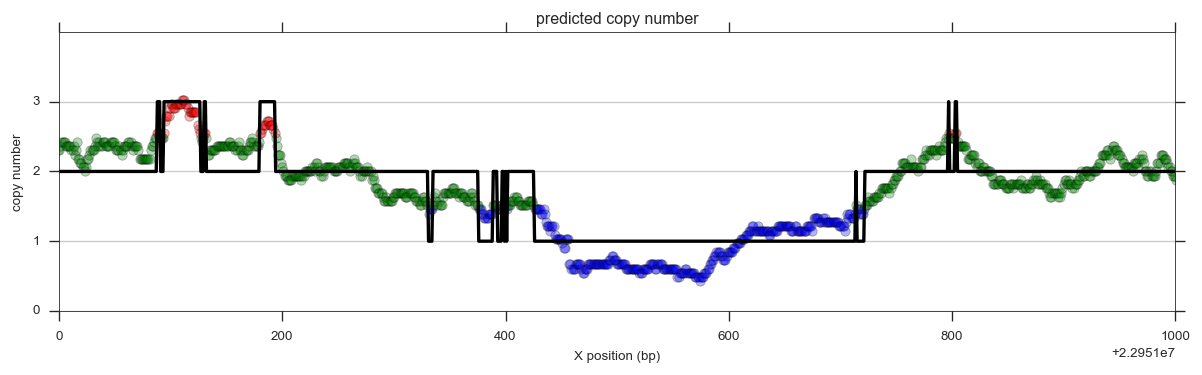

In [208]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(111)
for i, color in zip(range(5), 'kbgrcmy'):
    ax.plot(coverage.pos[copy_number == i], 
            depth_normed[copy_number == i], 
            color=color, marker='o', linestyle=' ', alpha=.3)
ax.plot(coverage.pos, copy_number, linestyle='-', linewidth=2, color='k')
ax.set_xlabel('%s position (bp)' % chrom)
ax.set_ylabel('copy number')
ax.set_yticks(range(4))
ax.grid(axis='y')

ax.set_xlim(22951000,22952000)
#ax.set_xlim(0, np.max(coverage.pos))
ax.set_title('predicted copy number');

In [442]:
def hmm_indv(indoov):
    indv = indoov.replace('-', '_')
    bam_fn_template = '/kwiat/2/mirror/vector/bam/bwa_gatk/{indv}.bam'
    bam_fn = bam_fn_template.format(indv=indv)
    bam = pysam.Samfile(bam_fn)
    fasta = pysam.Fastafile(phase1_ar3.genome_fn)
    chrom = 'X'
    coverage = pysamstats.load_coverage_ext(bam,  chrom=chrom, pad=True, start=22946600, end=22956600)
    depth_normed = coverage.reads_pp / np.median(coverage.reads_pp)*2
    var = depth_normed.var()
    copy_number = fit_hmm(depth_normed, 
                      transition_probability=.0001,
                      variance=var-0.2,
                      variance_fixed=.01)
    #work out coverage for the region that looks useful
    cn_bool = (coverage.pos > 22951400) & (coverage.pos < 22951700)
    cn_poi = copy_number.compress(cn_bool)
    sincov = np.bincount(cn_poi).argmax()
    
    #fix this so we only need indv input
    df = phase2_ar1.samples
    spec =  df[df.index == indoov].population[0]
    
    #make true/false flag
    if spec[2:]: 
        if sincov == 2 and spec[2:] == 'col' or sincov == 0 and spec[2:] == 'gam':
            truth = 'True'
        else:
            truth = 'Check'
    if not spec[2:]:
        truth = 'Unknown'
    
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(111)
    for i, color in zip(range(5), 'kbgrcmy'):
        ax.plot(coverage.pos[copy_number == i], 
                depth_normed[copy_number == i], 
                color=color, marker='o', linestyle=' ', alpha=.3)
    ax.plot(coverage.pos, copy_number, linestyle='-', linewidth=2, color='k')
    ax.set_xlabel('%s position (bp)' % chrom)
    ax.set_ylabel('copy number')
    ax.set_yticks(range(4))
    ax.grid(axis='y')

    ax.set_xlim(22951000,22952000)
    #ax.set_xlim(0, np.max(coverage.pos))
    title = ('PCN {pcn}, species {sp}, {truth}').format(pcn=sincov, sp=spec[2:], truth=truth)
    ax.set_title(title)
    

In [443]:
all_samples = phase2_ar1.sample_ids
top_samp = all_samples[10:20]

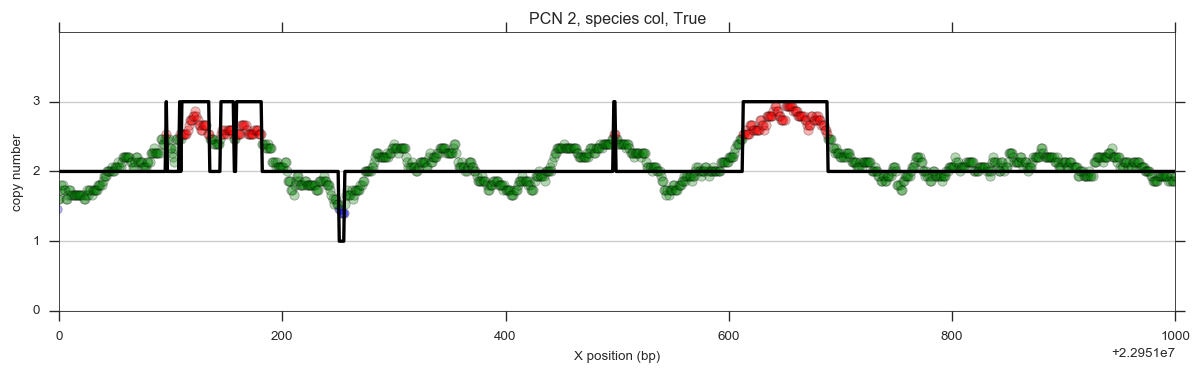

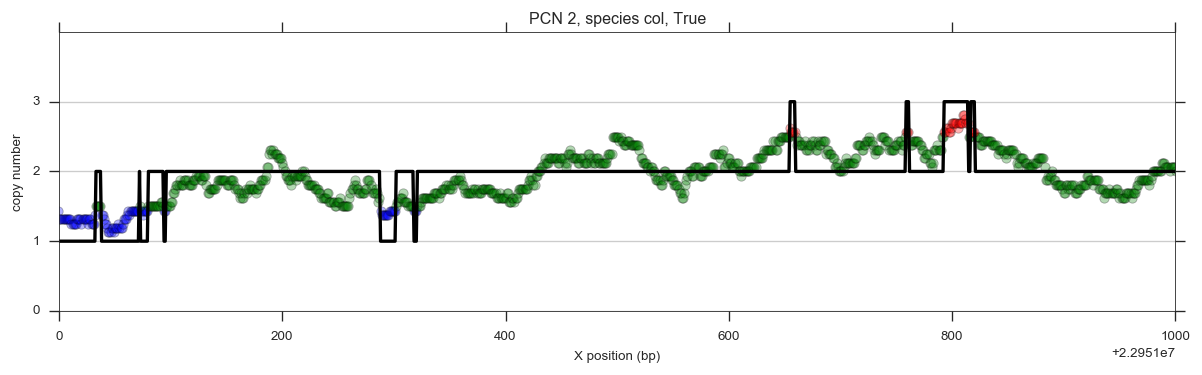

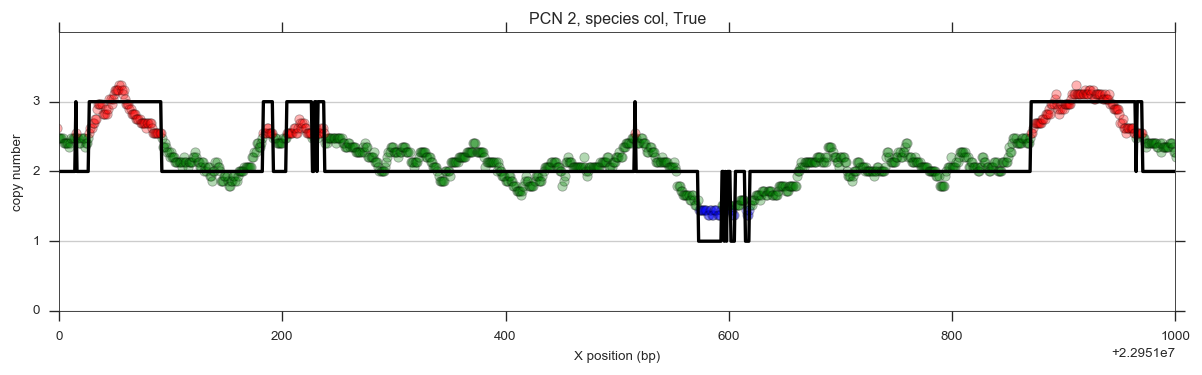

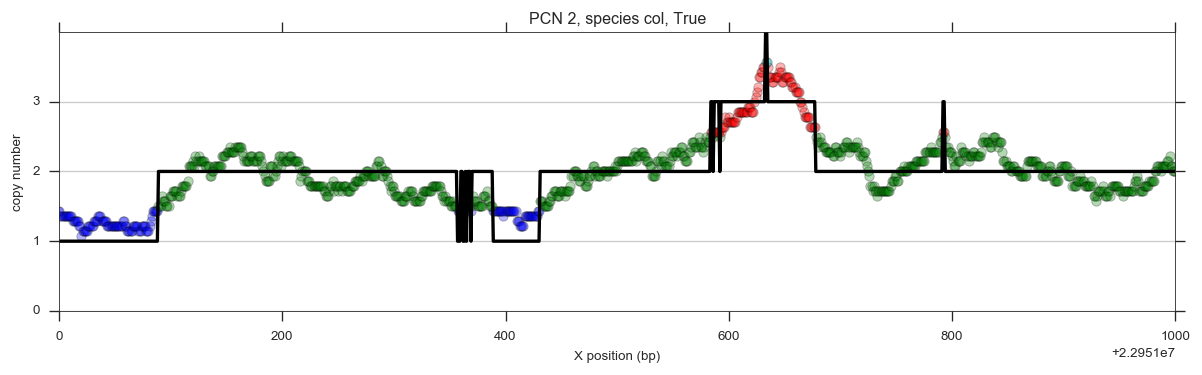

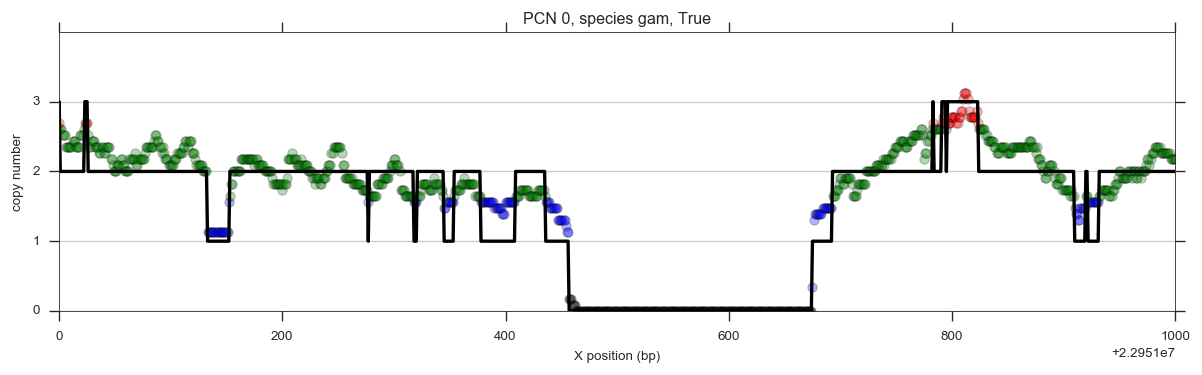

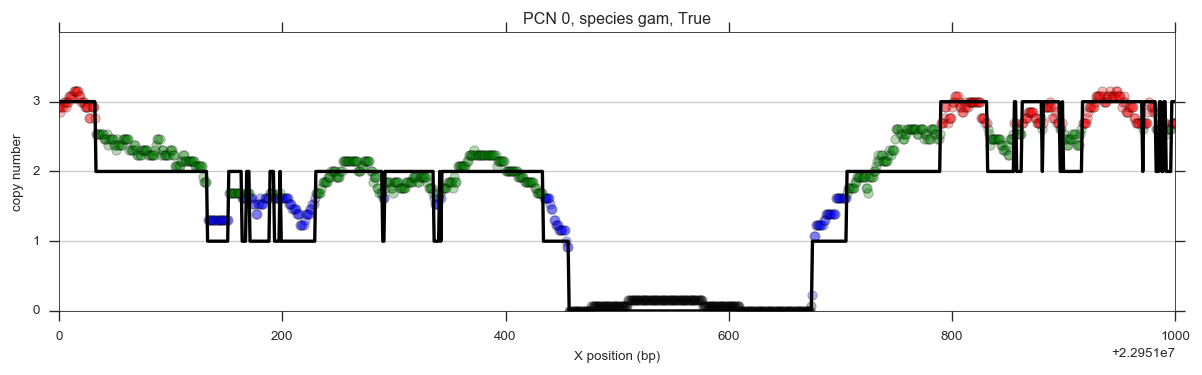

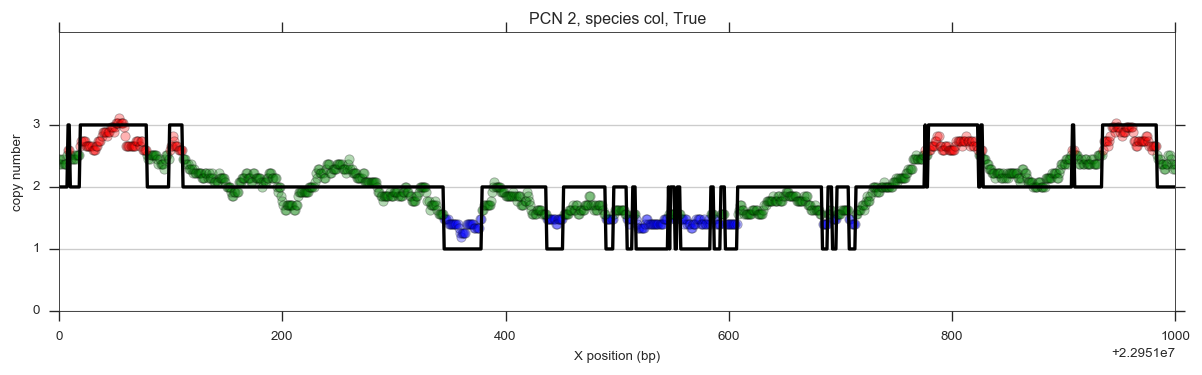

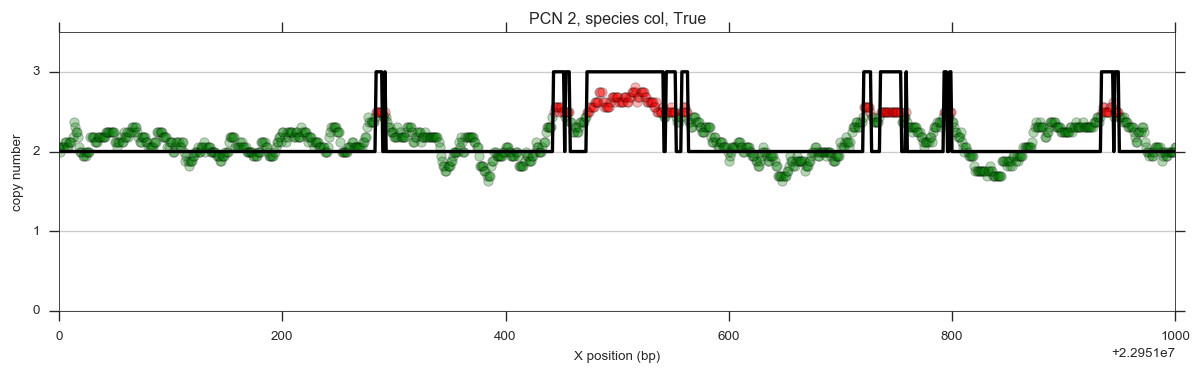

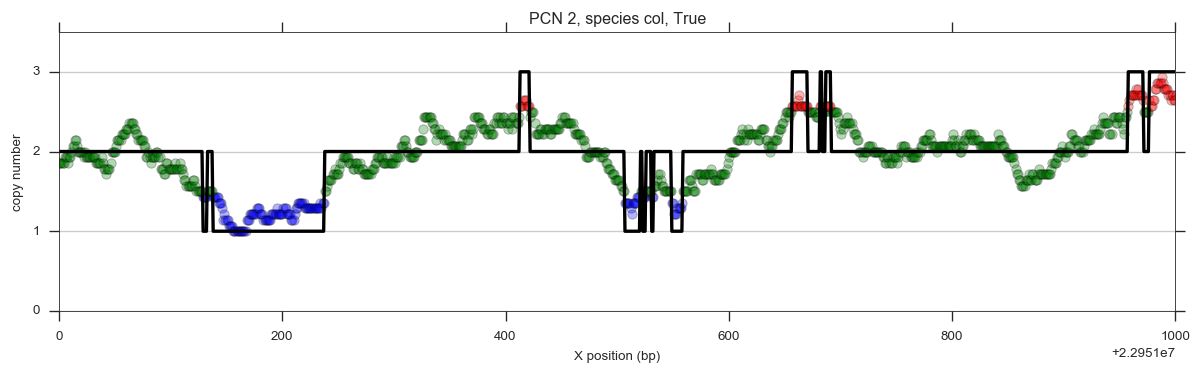

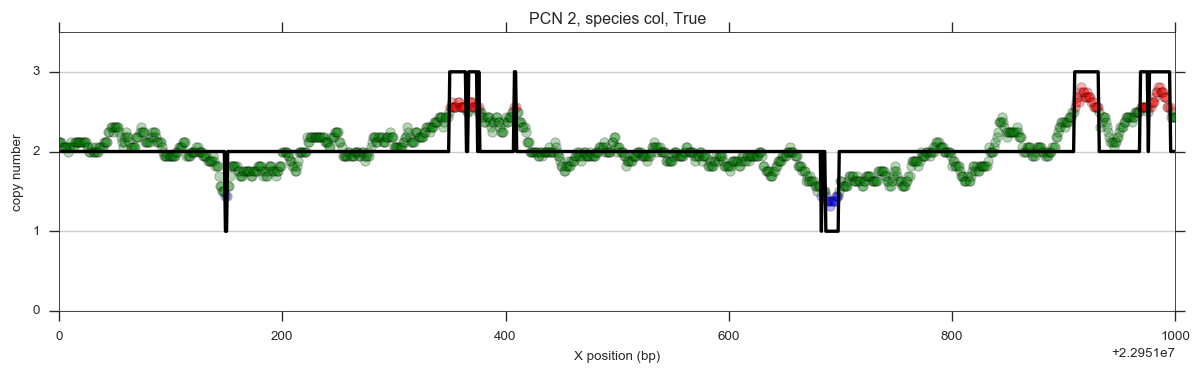

In [444]:
for s in top_samp:
    hmm_indv(s)

## HMM works for the hybrid crosses (each female has 1 copy of SINE)
- let's try the phase 2 samples we looked at before

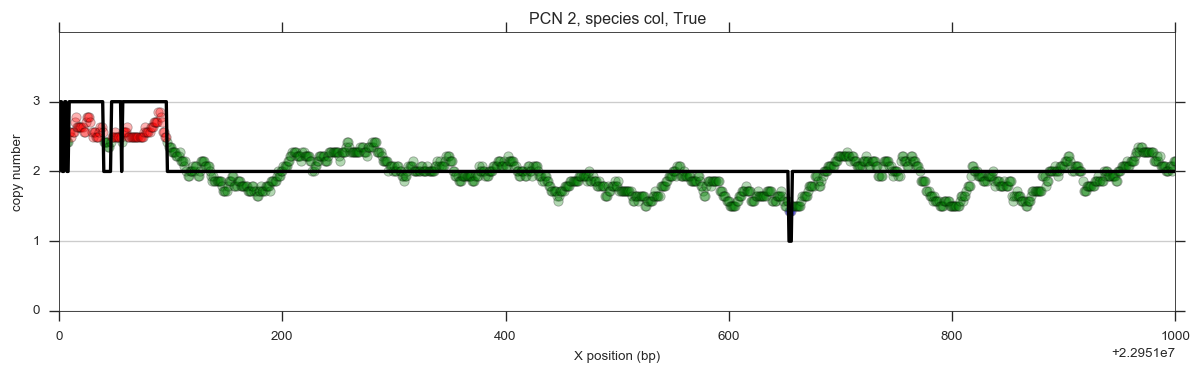

In [335]:
hmm_indv('AA0043-C')

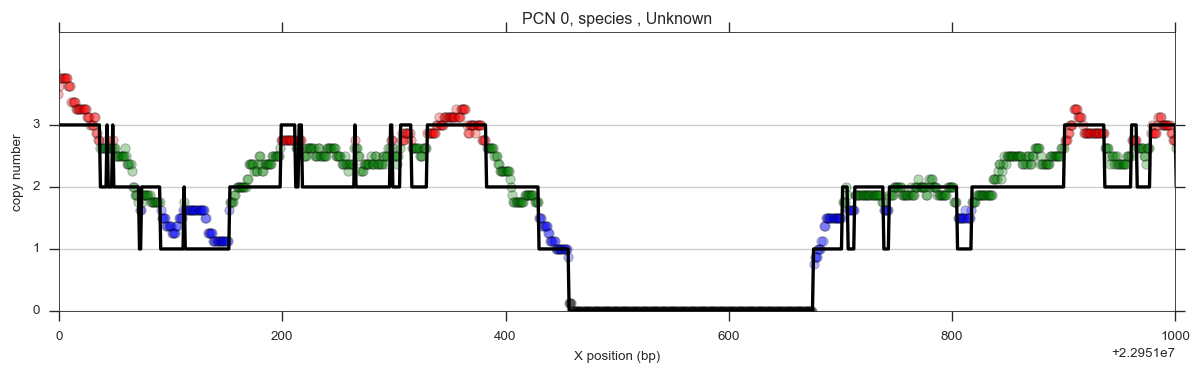

In [325]:
hmm_indv('AK0102-C')

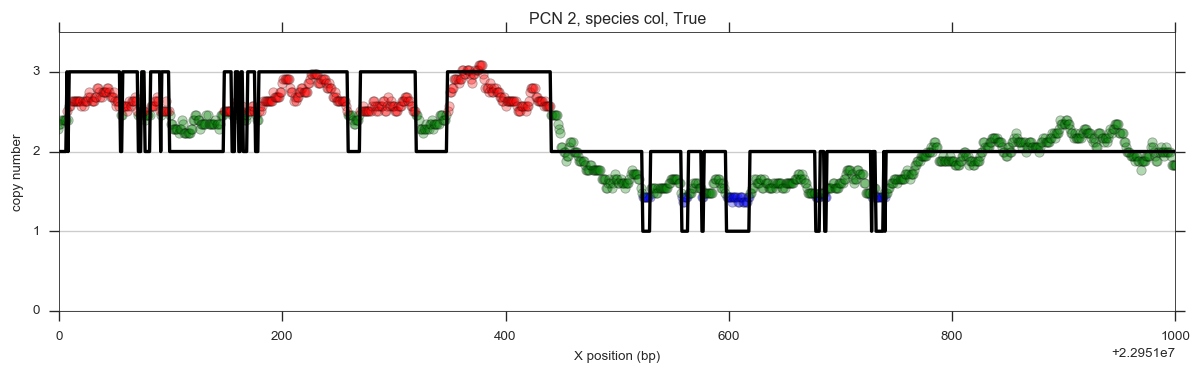

In [328]:
#coluzzii
hmm_indv('AA0044-C')

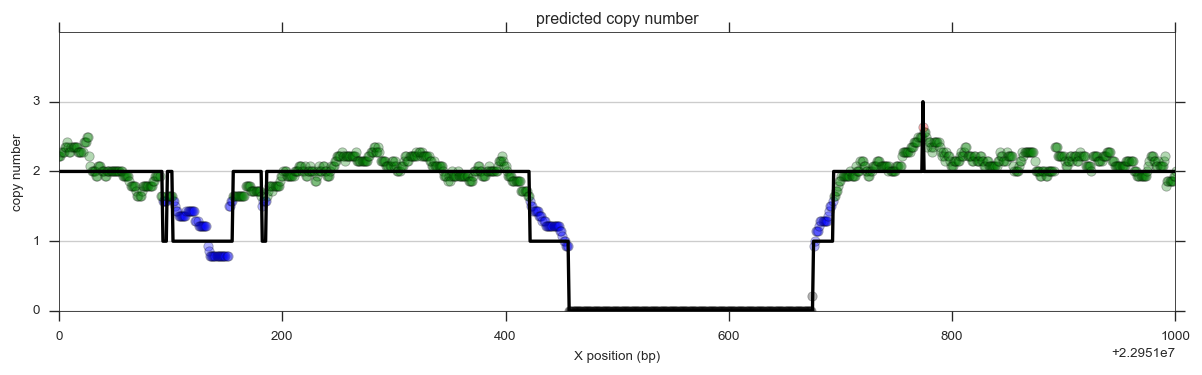

In [211]:
#gambiae
hmm_indv('AA0048_C')

In [390]:
fhy_indv = np.asarray(['AD0352-C',
           'AD0353-C',
           'AD0354-C',
           'AD0355-C',
           'AD0357-C',
           'AD0358-C',
           'AD0360-C',
           'AD0361-C',
           'AD0363-C',
           'AD0366-C',
           'AD0367-C',   
           'AD0368-C', 
           'AD0369-C', 
           'AD0370-C'])

In [393]:
def hmm_indv_crosses(indoov):
    indv = indoov.replace('-', '_')
    bam_fn_template = '/kwiat/2/mirror/vector/bam/bwa_gatk/{indv}.bam'
    bam_fn = bam_fn_template.format(indv=indv)
    bam = pysam.Samfile(bam_fn)
    fasta = pysam.Fastafile(phase1_ar3.genome_fn)
    chrom = 'X'
    coverage = pysamstats.load_coverage_ext(bam,  chrom=chrom, pad=True, start=22946600, end=22956600)
    depth_normed = coverage.reads_pp / np.median(coverage.reads_pp)*2
    var = depth_normed.var()
    copy_number = fit_hmm(depth_normed, 
                      transition_probability=.0001,
                      variance=var-0.2,
                      variance_fixed=.01)
    #work out coverage for the region that looks useful
    cn_bool = (coverage.pos > 22951400) & (coverage.pos < 22951700)
    cn_poi = copy_number.compress(cn_bool)
    sincov = np.bincount(cn_poi).argmax()
    
    
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(111)
    for i, color in zip(range(5), 'kbgrcmy'):
        ax.plot(coverage.pos[copy_number == i], 
                depth_normed[copy_number == i], 
                color=color, marker='o', linestyle=' ', alpha=.3)
    ax.plot(coverage.pos, copy_number, linestyle='-', linewidth=2, color='k')
    ax.set_xlabel('%s position (bp)' % chrom)
    ax.set_ylabel('copy number')
    ax.set_yticks(range(4))
    ax.grid(axis='y')

    ax.set_xlim(22951000,22952000)
    #ax.set_xlim(0, np.max(coverage.pos))
    title = ('PCN {pcn}').format(pcn=sincov)
    ax.set_title(title)
    

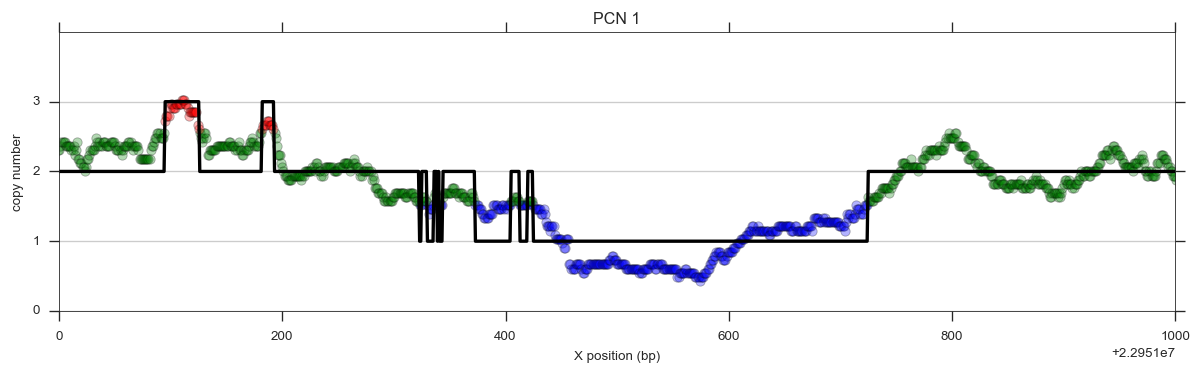

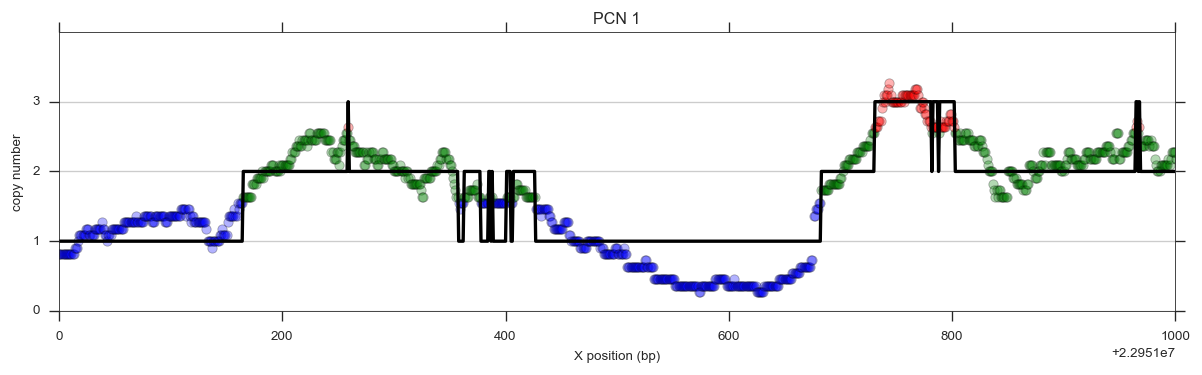

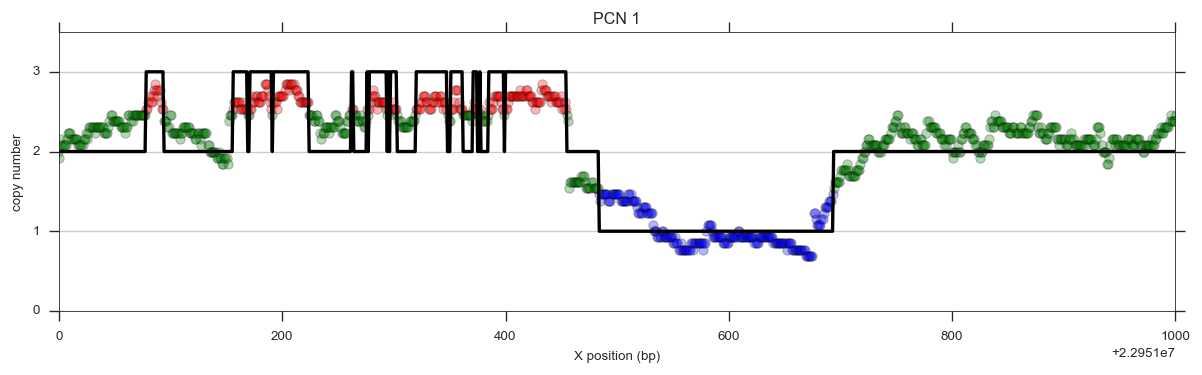

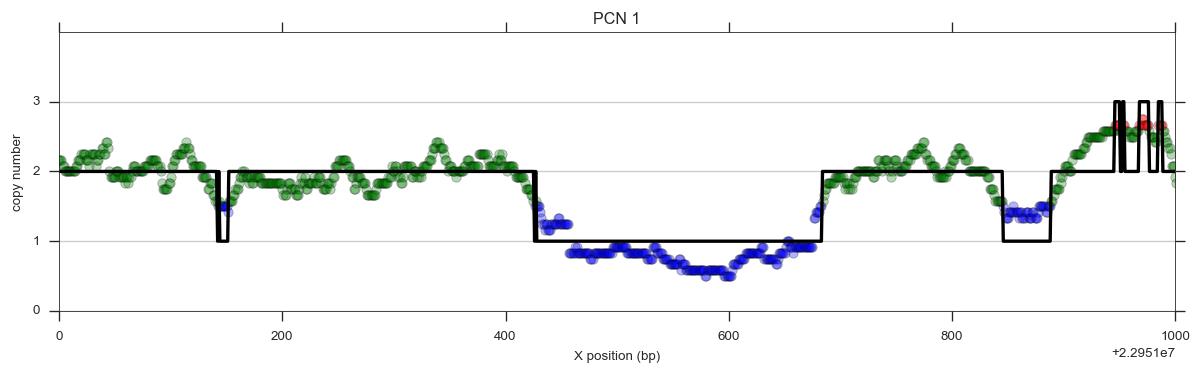

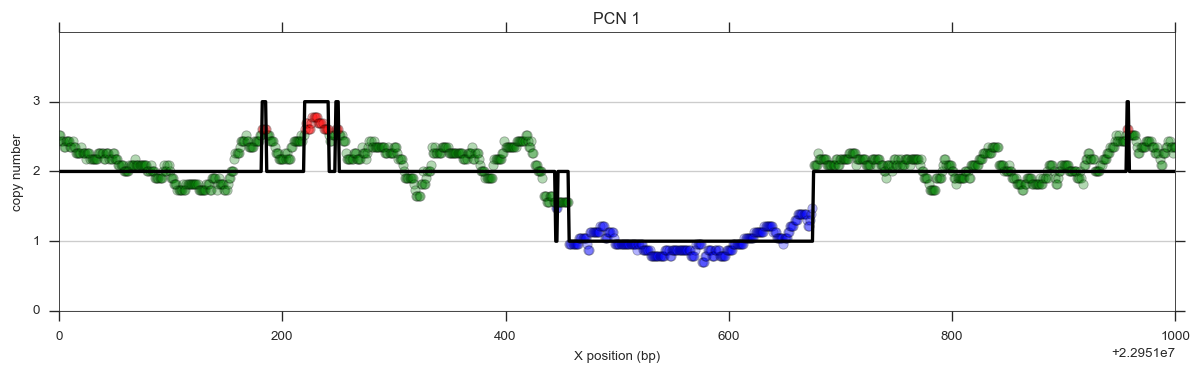

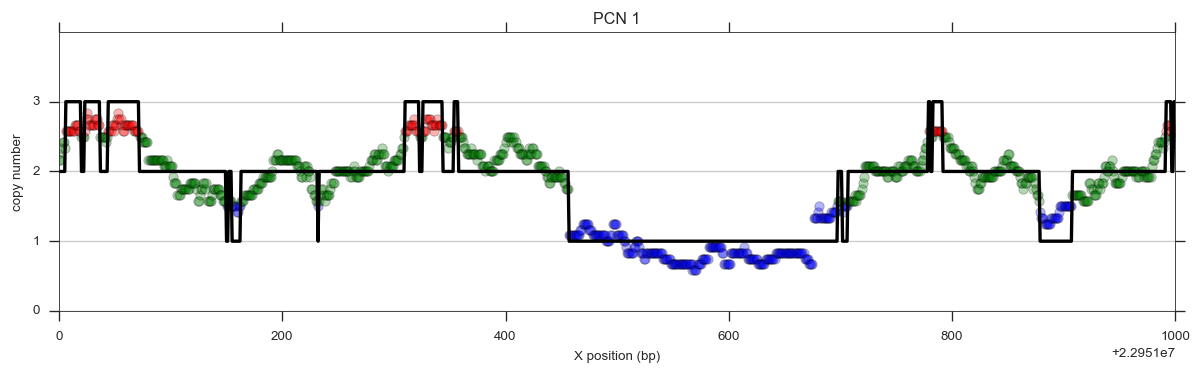

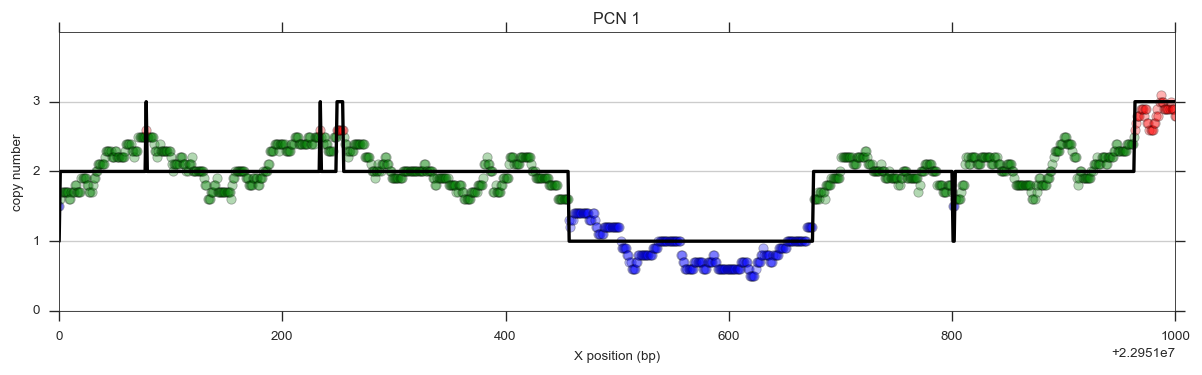

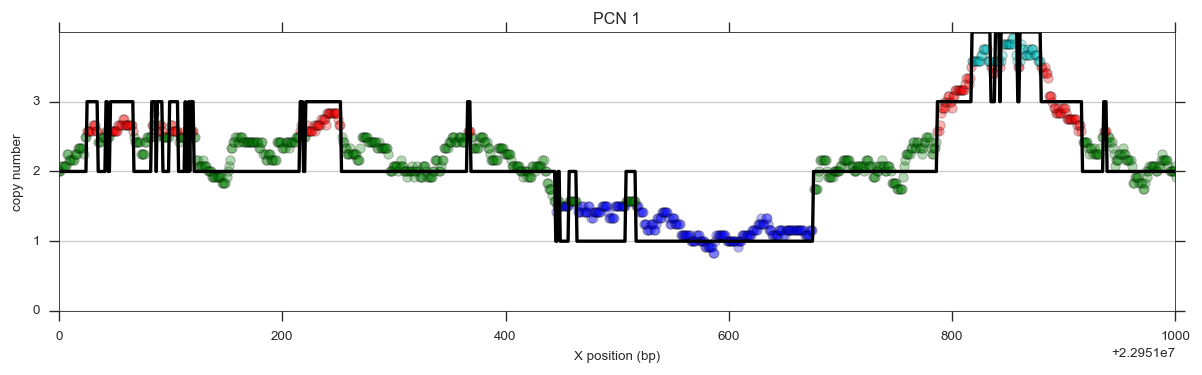

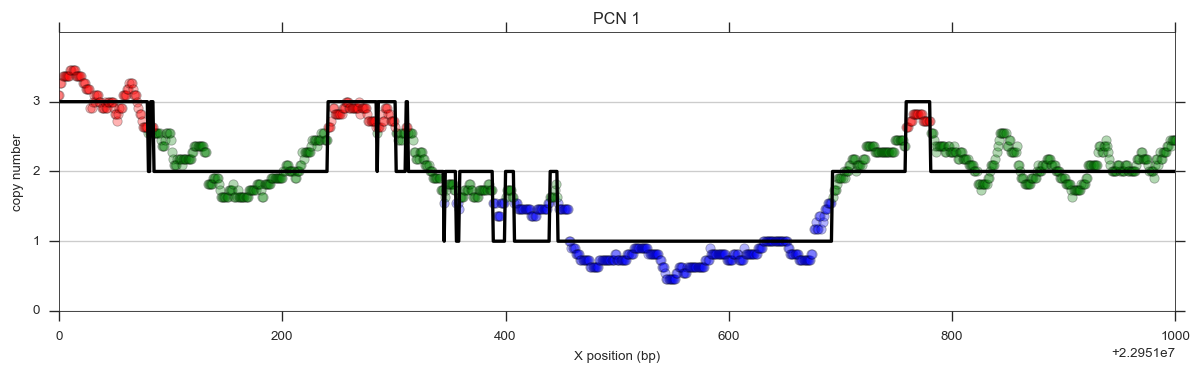

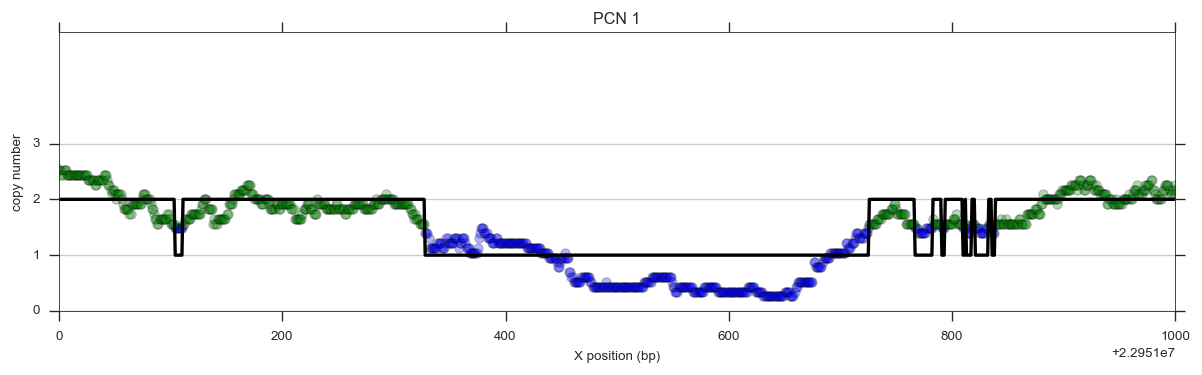

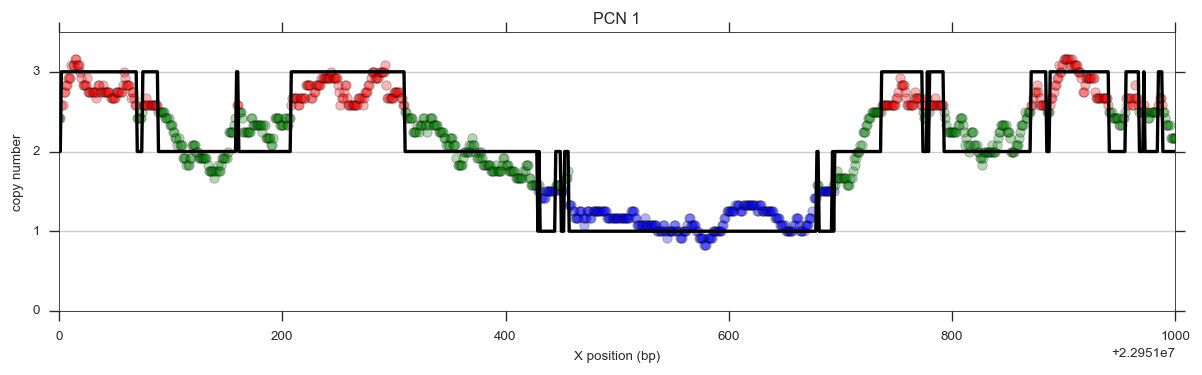

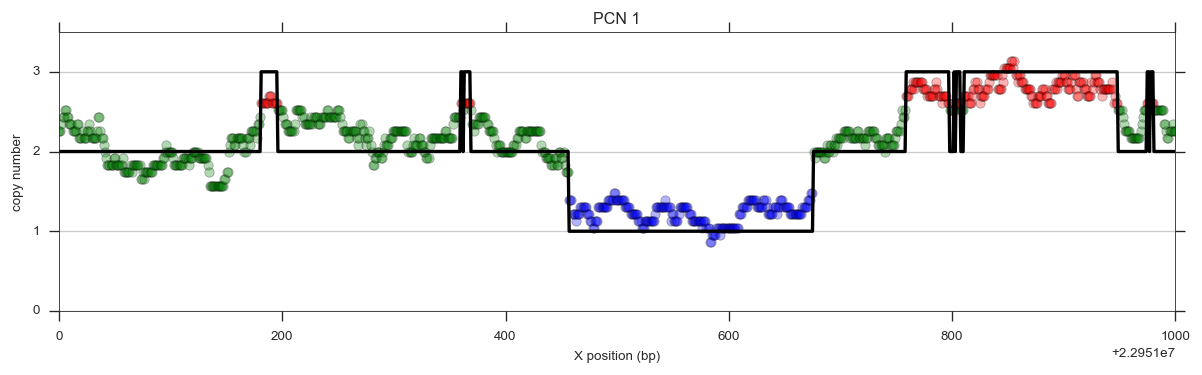

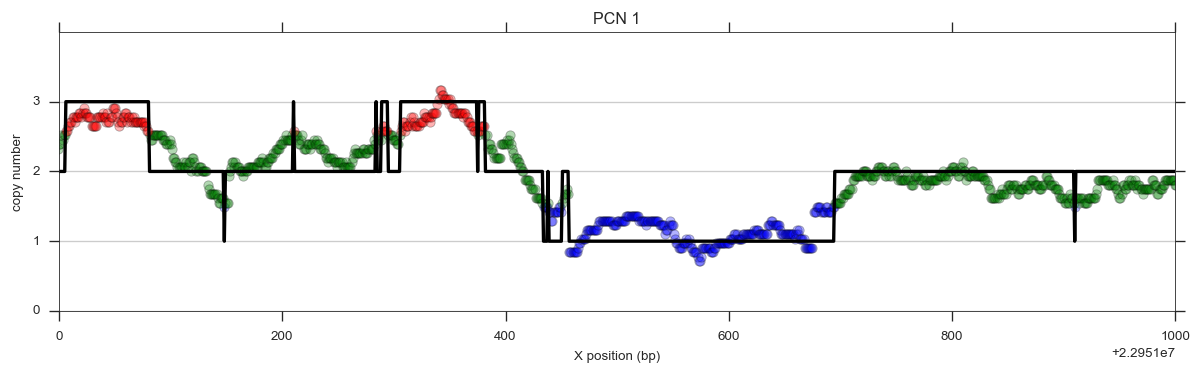

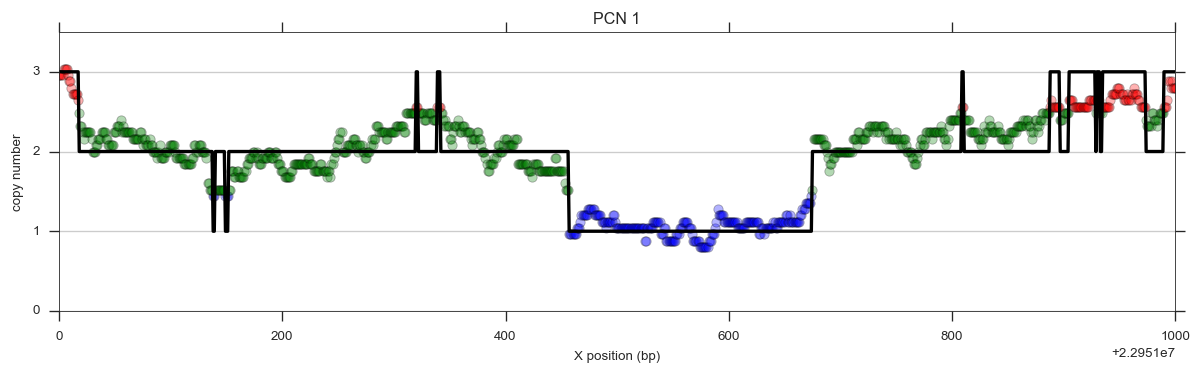

In [394]:
#hybrids from crosses
for i in fhy_indv:
    hmm_indv_crosses(i)

### so, this looks like it is working
- run the 1142 samples through using the mode number between 550 and 650
- compare concordance with other methods MM/SS/MS

### unfortunately a global variance at -0.3 kills some of the samples but at -0.2 we have a lot of stuff that is wrong
- keep fiddling

In [445]:
def hmm_indv_noplot(indoov):
    indv = indoov.replace('-', '_')
    bam_fn_template = '/kwiat/2/mirror/vector/bam/bwa_gatk/{indv}.bam'
    bam_fn = bam_fn_template.format(indv=indv)
    bam = pysam.Samfile(bam_fn)
    fasta = pysam.Fastafile(phase1_ar3.genome_fn)
    chrom = 'X'
    coverage = pysamstats.load_coverage_ext(bam,  chrom=chrom, pad=True, start=22946600, end=22956600)
    depth_normed = coverage.reads_pp / np.median(coverage.reads_pp)*2
    var = depth_normed.var()
    copy_number = fit_hmm(depth_normed, 
                      transition_probability=.0001,
                      variance=var-0.2,
                      variance_fixed=.01)
    #work out coverage for the region that looks useful
    cn_bool = (coverage.pos > 22951400) & (coverage.pos < 22951700)
    cn_poi = copy_number.compress(cn_bool)
    sincov = np.bincount(cn_poi).argmax()
    
    #fix this so we only need indv input
    df = phase2_ar1.samples
    spec =  df[df.index == indoov].population[0]
    
    #make true/false flag
    if spec[2:]: 
        if sincov == 2 and spec[2:] == 'col' or sincov == 0 and spec[2:] == 'gam':
            truth = 0
        else:
            truth = 1
    if not spec[2:]:
        truth = 0
    

In [452]:
all_true = []
for s in phase2_ar1.sample_ids[402:403]:
    all_true.append(hmm_indv_noplot(s))
    
np.count_nonzero(all_true)

ValueError: error during iteration

# GENOTYPES in more detail - SANDBOX

### in coluzzii

In [186]:
g1m = g1.compress(spm, axis=1)
g1m

<GenotypeChunkedArray shape=(1, 287, 2) dtype=int8 chunks=(1, 287, 2)
   nbytes=574 cbytes=384 cratio=1.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [187]:
g1m.count_hom_alt(), g1m.count_hom_ref(), g1m.count_het()

(2, 284, 1)

In [188]:
g1m.count_alleles()

<AlleleCountsChunkedArray shape=(1, 2) dtype=int32 chunks=(1, 2)
   nbytes=8 cbytes=333 cratio=0.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [189]:
287*2

574

In [190]:
np.count_nonzero(spm)

287

In [191]:
569/574*100

99.12891986062718

#### x1 = 22951731
- 287 samples show M genotype in meta data
- 574 alleles
- 569 = ref (T) = 283 hom ref (TT)
- 5 = alt (C) = 2 hom_alt (C/C), 1 het (T/C)
- 99% ancestry informative

#### who are these samples, were they not in p1?

### gambiae

In [129]:
#gambiae
g1s = g1.compress(sps, axis=1)
g1s

<GenotypeChunkedArray shape=(1, 720, 2) dtype=int8 chunks=(1, 720, 2)
   nbytes=1.4K cbytes=401 cratio=3.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [130]:
g1s.count_alleles()

<AlleleCountsChunkedArray shape=(1, 2) dtype=int32 chunks=(1, 2)
   nbytes=8 cbytes=333 cratio=0.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [136]:
g1s.count_hom_alt(), g1s.count_hom_ref(), g1s.count_het()

(714, 1, 5)

In [140]:
714/720*100

99.16666666666667

#### x2 = 22951783
- 720 samples show M genotype in meta data
- 1440 alleles
- 1433 = alt (C) = 714 hom alt (CC)
- 7 = ref (T) = 1 hom_ref (T/T), 5 het (T/C)
- 99% ancestry informative
###### who are these samples, were they not in phase1, are some of the 'wrong ones' the same in x1 - x2?

### hybrids

In [145]:
g1h = g1.compress(sph, axis=1)
g1h

<GenotypeChunkedArray shape=(1, 22, 2) dtype=int8 chunks=(1, 22, 2)
   nbytes=44 cbytes=393 cratio=0.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [146]:
g1h.count_alleles()

<AlleleCountsChunkedArray shape=(1, 2) dtype=int32 chunks=(1, 2)
   nbytes=8 cbytes=333 cratio=0.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [148]:
g1h.count_het(), g1h.count_hom_alt(), g1h.count_hom_ref()

(17, 5, 0)

# Let's check phase 1 (did Gio just use a 99% ac diff to choose these or were they 100%)

In [155]:
#make booleans for m, s and ms.
#as on X, males can't be hets.
tbl1 = phase1_ar3.tbl_samples
sp1 = np.asarray(tbl1['m_s'])
spm1 = sp1 == 'M'
sps1 = sp1 == 'S'
sph1 = sp1 == 'M/S'
passposx1 = phase1_ar3.callset_pass['X']['variants']['POS'][:]
x1 in passposx1, x2 in passposx1

(True, True)

In [157]:
#let's look at a variant table at these positions
vtbl1 = allel.VariantChunkedTable(phase1_ar3.callset_pass['X']['variants'], names=('POS', 'REF', 'ALT'))
vtbl1.query('POS == 22951731')

<VariantChunkedTable shape=(1,) dtype=[('POS', '<i4'), ('REF', 'S1'), ('ALT', 'S1', (3,))]
   nbytes=8 cbytes=939 cratio=0.0
   values=allel.chunked.storage_zarr.ZarrTable>

In [158]:
vtbl.query('POS == 22951783')

<VariantChunkedTable shape=(1,) dtype=[('POS', '<i4'), ('REF', 'S1'), ('ALT', 'S1', (3,))]
   nbytes=8 cbytes=939 cratio=0.0
   values=allel.chunked.storage_zarr.ZarrTable>

In [159]:
vtbl1

<VariantChunkedTable shape=(5257352,) dtype=[('POS', '<i4'), ('REF', 'S1'), ('ALT', 'S1', (3,))]
   nbytes=40.1M cbytes=11.9M cratio=3.4
   values=h5py._hl.group.Group>

In [161]:
aim11 = passposx1 == x1
aim21 = passposx1 == x2

In [162]:
gt1 = allel.GenotypeChunkedArray(phase1_ar3.callset_pass['X']['calldata']['genotype'])
g11 = gt1.compress(aim11, axis=0)
g11

<GenotypeChunkedArray shape=(1, 765, 2) dtype=int8 chunks=(1, 765, 2)
   nbytes=1.5K cbytes=516 cratio=3.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [163]:
#coluzzii
g1m1 = g11.compress(spm1, axis=1)
g1m1

<GenotypeChunkedArray shape=(1, 132, 2) dtype=int8 chunks=(1, 132, 2)
   nbytes=264 cbytes=380 cratio=0.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [164]:
g1m1.count_alleles()

<AlleleCountsChunkedArray shape=(1, 2) dtype=int32 chunks=(1, 2)
   nbytes=8 cbytes=333 cratio=0.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

In [165]:
#gambiae
g1s1 = g11.compress(sps1, axis=1)
g1s1.count_alleles()

<AlleleCountsChunkedArray shape=(1, 2) dtype=int32 chunks=(1, 2)
   nbytes=8 cbytes=333 cratio=0.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1}
   values=zarr.core.Array>

### okay so these markers weren't perfect in phase 1.
- let's see who the weird ones are - i.e. if they're GWA/KE maybe still useful

# Which pops do the 'wrong-uns' come from?

In [173]:
subpops

{'AOcol': [880,
  881,
  882,
  883,
  884,
  885,
  886,
  887,
  888,
  889,
  890,
  891,
  892,
  893,
  894,
  895,
  896,
  897,
  898,
  899,
  900,
  901,
  902,
  903,
  904,
  905,
  906,
  907,
  908,
  909,
  910,
  911,
  912,
  913,
  914,
  915,
  916,
  917,
  918,
  919,
  920,
  921,
  922,
  923,
  924,
  925,
  926,
  927,
  928,
  929,
  930,
  931,
  932,
  933,
  934,
  935,
  936,
  937,
  938,
  939,
  940,
  941,
  942,
  943,
  944,
  945,
  946,
  947,
  948,
  949,
  950,
  951,
  952,
  953,
  954,
  955,
  956,
  957],
 'BFcol': [68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  94,
  95,
  96,
  106,
  107,
  108,
  109,
  110,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  162,
  167,
  168,
  170,
  171,
  172,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  183,
  187,
  190,
  193,
  195,
  196,
  198,
  199,
  200,
  201,
  2